In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newborn-health-monitoring-dataset/newborn_health_monitoring_with_risk.csv


In [57]:
print("🍼 Introduction:")
print( " Dataset Overview:This comprehensive neonatal health dataset comprises 3,000 newborn records with 25 clinical features, encompassing vital signs, growth metrics, feeding behaviors, neurological reflexes, and comprehensive medical evaluations. The dataset serves as a robust foundation for analyzing critical health indicators during the crucial neonatal period.")

print("🎯 Clinical Challenge & Objectives:Neonatal healthcare faces significant challenges in the early identification of infants susceptible to health complications. Our research aims to develop predictive classification models that accurately stratify newborns into distinct risk categories (e.g., 'Healthy' vs. 'At Risk') using multidimensional clinical data. This computational approach seeks to enhance clinical decision-making, facilitate proactive interventions, and ultimately improve neonatal health outcomes through data-driven pediatric care.")

🍼 Introduction:
 Dataset Overview:This comprehensive neonatal health dataset comprises 3,000 newborn records with 25 clinical features, encompassing vital signs, growth metrics, feeding behaviors, neurological reflexes, and comprehensive medical evaluations. The dataset serves as a robust foundation for analyzing critical health indicators during the crucial neonatal period.
🎯 Clinical Challenge & Objectives:Neonatal healthcare faces significant challenges in the early identification of infants susceptible to health complications. Our research aims to develop predictive classification models that accurately stratify newborns into distinct risk categories (e.g., 'Healthy' vs. 'At Risk') using multidimensional clinical data. This computational approach seeks to enhance clinical decision-making, facilitate proactive interventions, and ultimately improve neonatal health outcomes through data-driven pediatric care.


In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
df = pd.read_csv("/kaggle/input/newborn-health-monitoring-dataset/newborn_health_monitoring_with_risk.csv")

print("🔹 Step 1: Handling Missing Values")
# Check missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Fill numeric missing with median, categorical with mode
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after cleaning:\n", df.isnull().sum())


# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("Categorical columns encoded successfully.")



🔹 Step 1: Handling Missing Values
Missing values before cleaning:
 baby_id                           0
name                              0
gender                            0
gestational_age_weeks             0
birth_weight_kg                   0
birth_length_cm                   0
birth_head_circumference_cm       0
date                              0
age_days                          0
weight_kg                         0
length_cm                         0
head_circumference_cm             0
temperature_c                     0
heart_rate_bpm                    0
respiratory_rate_bpm              0
oxygen_saturation                 0
feeding_type                      0
feeding_frequency_per_day         0
urine_output_count                0
stool_count                       0
jaundice_level_mg_dl              0
apgar_score                    2900
immunizations_done                0
reflexes_normal                   0
risk_level                        0
dtype: int64
Missing values after

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [59]:
print(" Removing Irrelevant/ID Columns")
# Drop baby_id and name (not useful for ML models)
df.drop(["baby_id", "name", "date"], axis=1, inplace=True)
print("Dropped columns: baby_id, name, date")

 Removing Irrelevant/ID Columns
Dropped columns: baby_id, name, date


In [60]:
print("Encoding Categorical Variables")
# Identify categorical columns
categorical_cols = df.select_dtypes(include="object").columns.tolist()
print("Categorical columns:", categorical_cols)

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("Categorical columns encoded successfully.")

Encoding Categorical Variables
Categorical columns: ['risk_level']
Categorical columns encoded successfully.


In [61]:
print("Feature Scaling")
# Scale numeric features
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Numeric features scaled using StandardScaler.")

Feature Scaling
Numeric features scaled using StandardScaler.


In [62]:
print("Splitting Data")
# Define features (X) and target (y)
X = df.drop("risk_level", axis=1)
y = df["risk_level"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data split into training and testing sets:")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Splitting Data
Data split into training and testing sets:
Training set size: (2400, 21)
Testing set size: (600, 21)


In [63]:
df=pd.read_csv('/kaggle/input/newborn-health-monitoring-dataset/newborn_health_monitoring_with_risk.csv')
df

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater
invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


baby_id   name  gender  gestational_age_weeks  birth_weight_kg  \
0       B001   Sara  Female                   40.2             3.30   
1       B001   Sara  Female                   40.2             3.30   
2       B001   Sara  Female                   40.2             3.30   
3       B001   Sara  Female                   40.2             3.30   
4       B001   Sara  Female                   40.2             3.30   
...      ...    ...     ...                    ...              ...   
2995    B100  Brian    Male                   39.1             4.47   
2996    B100  Brian    Male                   39.1             4.47   
2997    B100  Brian    Male                   39.1             4.47   
2998    B100  Brian    Male                   39.1             4.47   
2999    B100  Brian    Male                   39.1             4.47   

      birth_length_cm  birth_head_circumference_cm        date  age_days  \
0                50.0                         31.9  2024-12-10         1   
1                50.0                         31.9  2024-12-11         2   
2                50.0                         31.9  2024-12-12         3   
3                50.0                         31.9  2024-12-13         4   
4                50.0                         31.9  2024-12-14         5   
...               ...                          ...         ...       ...   
2995             50.8                         36.3  2025-03-31        26   
2996             50.8                         36.3  2025-04-01        27   
2997             50.8                         36.3  2025-04-02        28   
2998             50.8                         36.3  2025-04-03        29   
2999             50.8                         36.3  2025-04-04        30   

      weight_kg  ...  oxygen_saturation   feeding_type  \
0          3.28  ...                 98        Formula   
1          3.35  ...                 99        Formula   
2          3.35  ...                 97  Breastfeeding   
3          3.48  ...                 97          Mixed   
4          3.50  ...                 96  Breastfeeding   
...         ...  ...                ...            ...   
2995       5.29  ...                 96        Formula   
2996       5.23  ...                 98  Breastfeeding   
2997       5.29  ...                 98  Breastfeeding   
2998       5.39  ...                 97          Mixed   
2999       5.41  ...                 97          Mixed   

      feeding_frequency_per_day  urine_output_count  stool_count  \
0                            11                   9            0   
1                            11                   5            2   
2                             7                   6            5   
3                            11                   8            4   
4                            11                   7            1   
...                         ...                 ...          ...   
2995                          8                   7            4   
2996                          7                   6            1   
2997                          8                   4            1   
2998                         10                   5            2   
2999                          9                   7            1   

      jaundice_level_mg_dl apgar_score  immunizations_done  reflexes_normal  \
0                      4.2         7.0                 Yes              Yes   
1                     10.6         NaN                  No               No   
2                      9.8         NaN                  No               No   
3                      8.1         NaN                  No              Yes   
4                     11.6         NaN                  No              Yes   
...                    ...         ...                 ...              ...   
2995                   4.0         NaN                  No              Yes   
2996                   2.4         NaN                  No              Yes   
2997          

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   baby_id                      3000 non-null   object 
 1   name                         3000 non-null   object 
 2   gender                       3000 non-null   object 
 3   gestational_age_weeks        3000 non-null   float64
 4   birth_weight_kg              3000 non-null   float64
 5   birth_length_cm              3000 non-null   float64
 6   birth_head_circumference_cm  3000 non-null   float64
 7   date                         3000 non-null   object 
 8   age_days                     3000 non-null   int64  
 9   weight_kg                    3000 non-null   float64
 10  length_cm                    3000 non-null   float64
 11  head_circumference_cm        3000 non-null   float64
 12  temperature_c                3000 non-null   float64
 13  heart_rate_bpm    

In [65]:
df.describe()

gestational_age_weeks  birth_weight_kg  birth_length_cm  \
count            3000.000000      3000.000000      3000.000000   
mean               38.878000         3.205000        49.727000   
std                 1.570076         0.561555         2.145065   
min                35.400000         1.860000        45.100000   
25%                37.800000         2.870000        48.475000   
50%                38.800000         3.165000        49.550000   
75%                40.100000         3.625000        51.025000   
max                43.000000         4.470000        55.800000   

       birth_head_circumference_cm     age_days    weight_kg    length_cm  \
count                  3000.000000  3000.000000  3000.000000  3000.000000   
mean                     34.128000    15.500000     3.669730    50.508000   
std                       1.486254     8.656884     0.621355     2.196846   
min                      31.200000     1.000000     1.790000    45.000000   
25%                      32.975000     8.000000     3.220000    49.100000   
50%                      34.100000    15.500000     3.660000    50.400000   
75%                      34.800000    23.000000     4.100000    51.800000   
max                      38.100000    30.000000     5.410000    57.400000   

       head_circumference_cm  temperature_c  heart_rate_bpm  \
count            3000.000000    3000.000000     3000.000000   
mean               34.438900      37.002933      139.682000   
std                 1.500893       0.310747       10.139386   
min                31.100000      35.800000      100.000000   
25%                33.300000      36.800000      133.000000   
50%                34.400000      37.000000      140.000000   
75%                35.300000      37.200000      146.000000   
max                38.700000      38.100000      173.000000   

       respiratory_rate_bpm  oxygen_saturation  feeding_frequency_per_day  \
count           3000.000000        3000.000000                3000.000000   
mean              39.421333          97.473000                   9.450000   
std                4.999481           1.048318                   1.707182   
min               23.000000          94.000000                   7.000000   
25%               36.000000          97.000000                   8.000000   
50%               39.000000          97.000000                   9.000000   
75%               43.000000          98.000000                  11.000000   
max               57.000000         101.000000                  12.000000   

       urine_output_count  stool_count  jaundice_level_mg_dl  apgar_score  
count         3000.000000  3000.000000           3000.000000   100.000000  
mean             6.470000     2.448333              4.163467     8.400000  
std              1.700803     1.699106              2.861971     1.163415  
min              4.000000     0.000000              0.000000     7.000000  
25%              5.000000     1.000000              2.500000     7.000000  
50%              6.000000     2.000000              3.300000     8.000000  
75%              8.000000     4.000000              4.300000     9.250000  
max              9.000000     5.000000             15.000000    10.000000

Quick EDA: Numerical Feature Distributions
Features: 11 | Samples: 3000


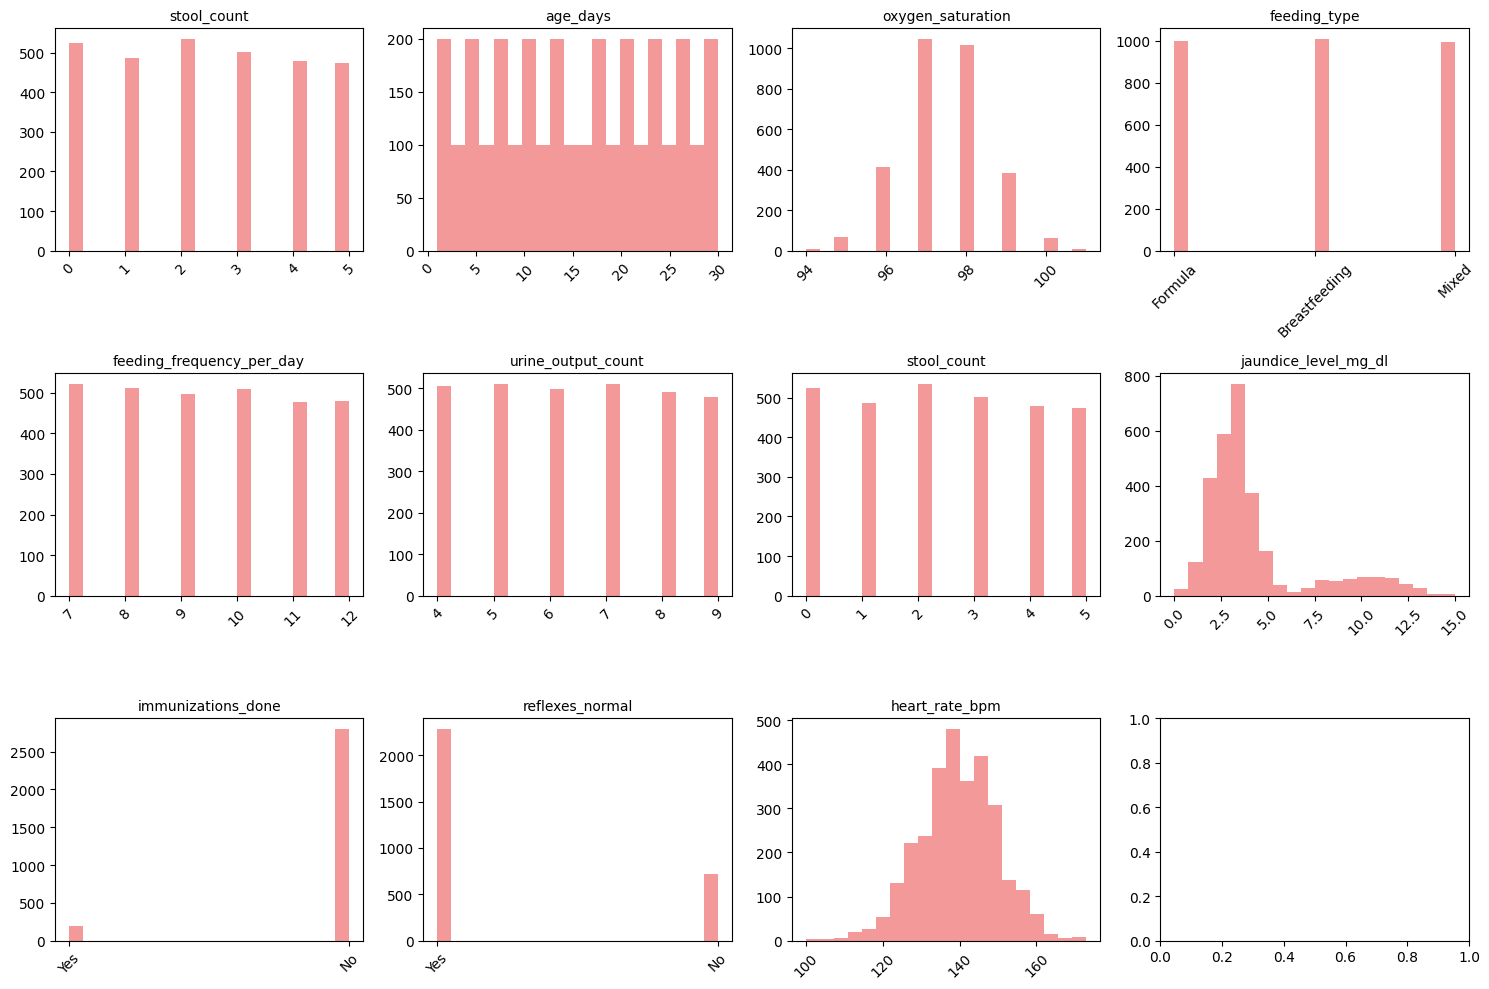

In [66]:
import matplotlib.pyplot as plt

# Target numerical features for EDA
features_to_plot = [
    "stool_count", "age_days", "oxygen_saturation", "feeding_type", 
    "feeding_frequency_per_day", "urine_output_count", "stool_count", 
    "jaundice_level_mg_dl", "immunizations_done", "reflexes_normal","heart_rate_bpm"
]

print("Quick EDA: Numerical Feature Distributions")
print(f"Features: {len(features_to_plot)} | Samples: {len(df)}")

# Efficient plotting
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

for idx, feature in enumerate(features_to_plot):
    row, col = idx // 4, idx % 4
    axes[row, col].hist(df[feature], bins=20, alpha=0.8, color='lightcoral')
    axes[row, col].set_title(feature, fontsize=10)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



📊 Generating Countplots for Selected Categorical Features...
These plots visualize the distribution of key categorical variables in the dataset.
They help us understand data balance, dominant categories, and potential biases.



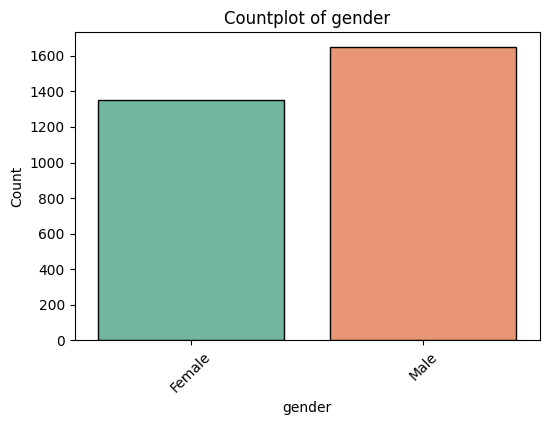

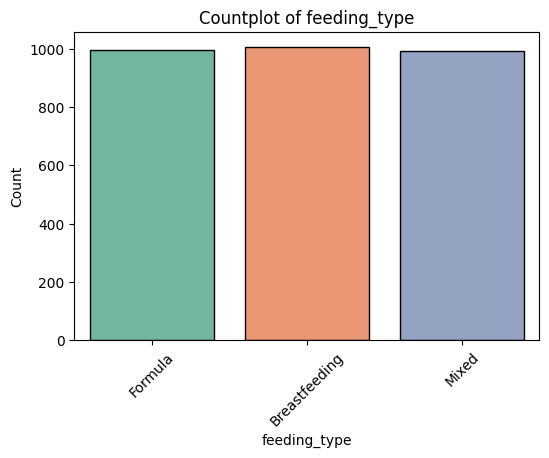

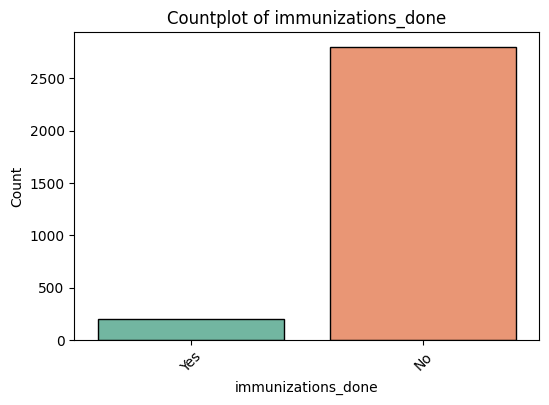

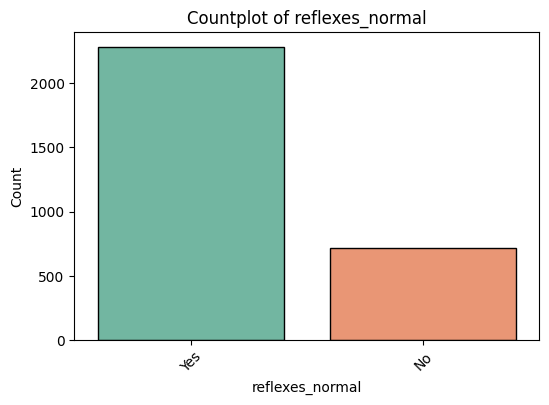

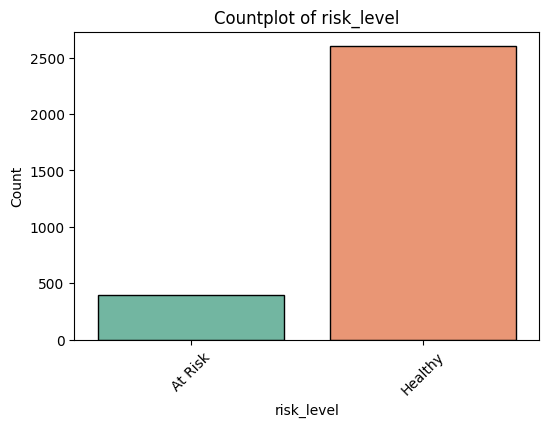

✅ Countplots generated successfully with proper category labels.
🔎 Interpretation Guide:
- Gender countplot shows male/female balance.
- Feeding type reveals practices (breastfeeding, formula, mixed).
- Immunizations_done and reflexes_normal show Yes/No distributions.
- Risk_level (target) distribution indicates class balance (Healthy vs At Risk).


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reload dataset (to get original categories before encoding)
df_original = pd.read_csv("/kaggle/input/newborn-health-monitoring-dataset/newborn_health_monitoring_with_risk.csv")

categorical_cols = ["gender", "feeding_type", "immunizations_done", "reflexes_normal", "risk_level"]

print("📊 Generating Countplots for Selected Categorical Features...")
print("These plots visualize the distribution of key categorical variables in the dataset.")
print("They help us understand data balance, dominant categories, and potential biases.\n")

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df_original[col], palette="Set2", edgecolor="black")
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

print("✅ Countplots generated successfully with proper category labels.")
print("🔎 Interpretation Guide:")
print("- Gender countplot shows male/female balance.")
print("- Feeding type reveals practices (breastfeeding, formula, mixed).")
print("- Immunizations_done and reflexes_normal show Yes/No distributions.")
print("- Risk_level (target) distribution indicates class balance (Healthy vs At Risk).")

📊 Generating Boxplots for Important Features...
These plots help visualize distribution, median, spread, and outliers of numerical variables across categories.



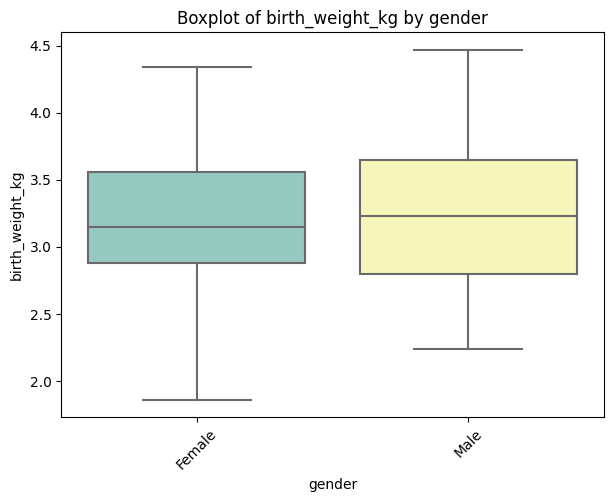

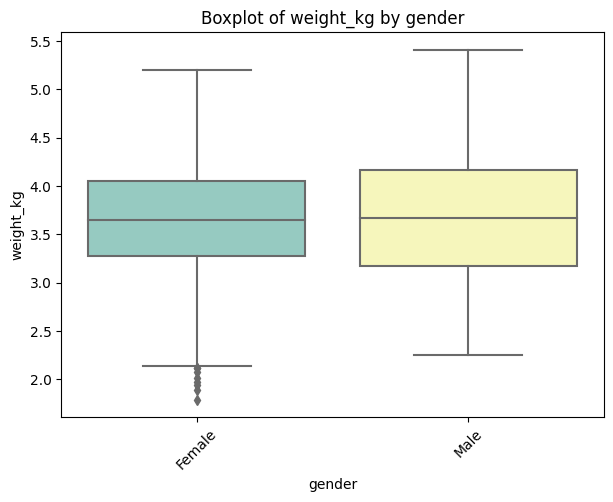

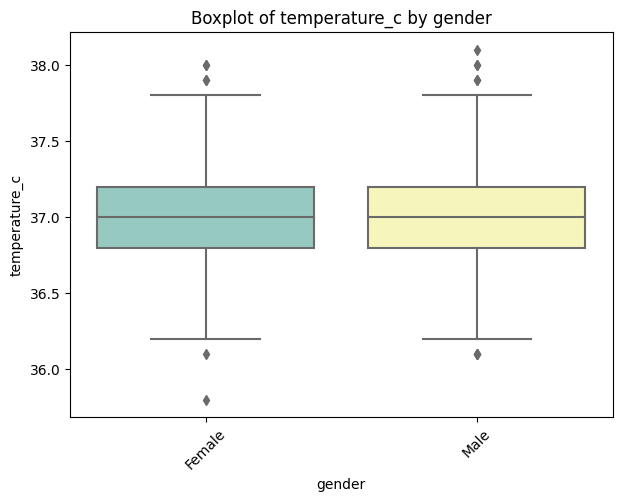

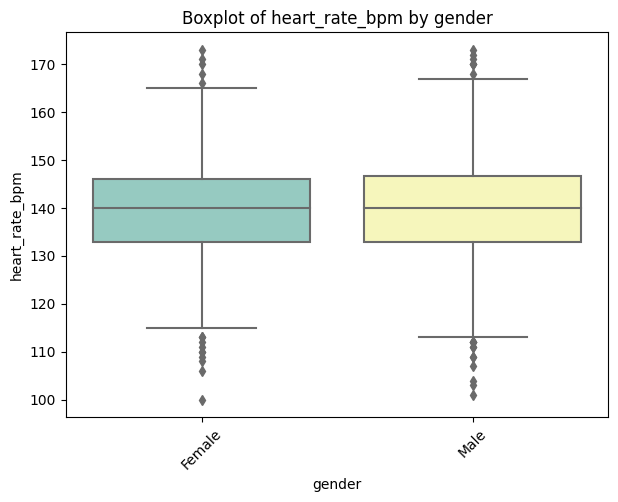

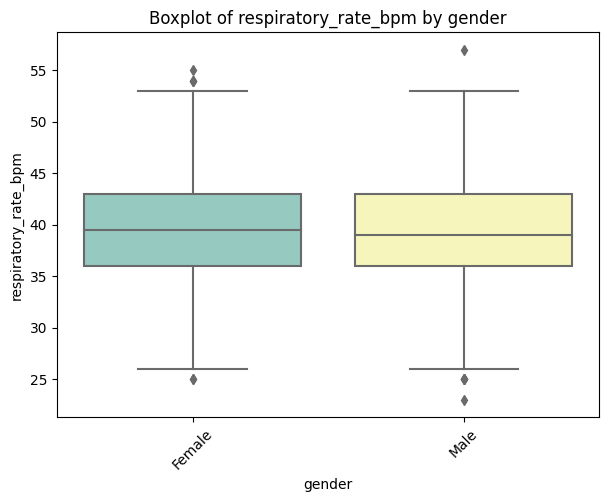

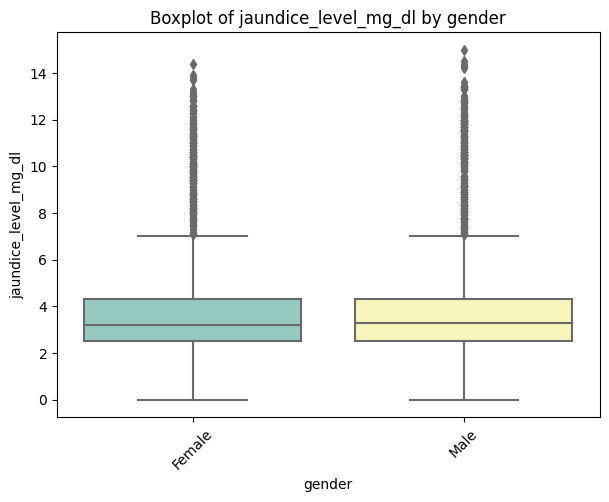

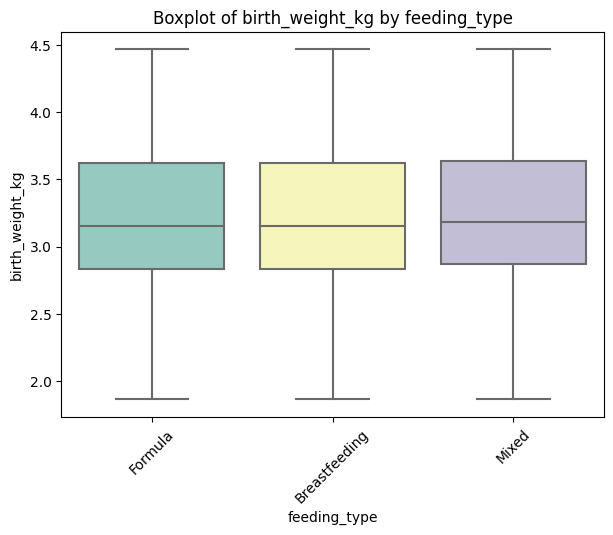

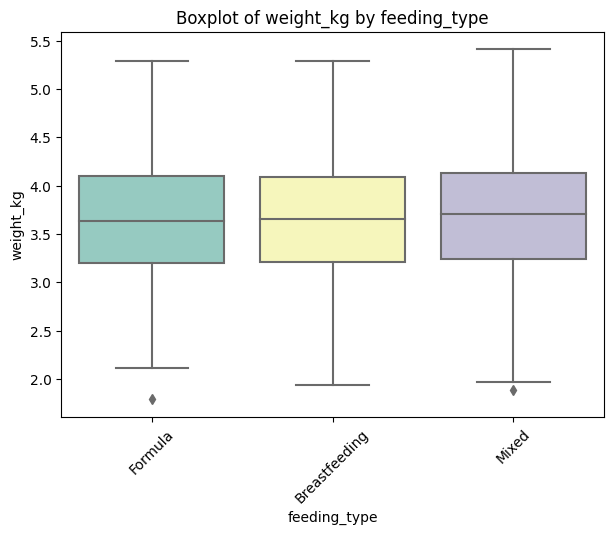

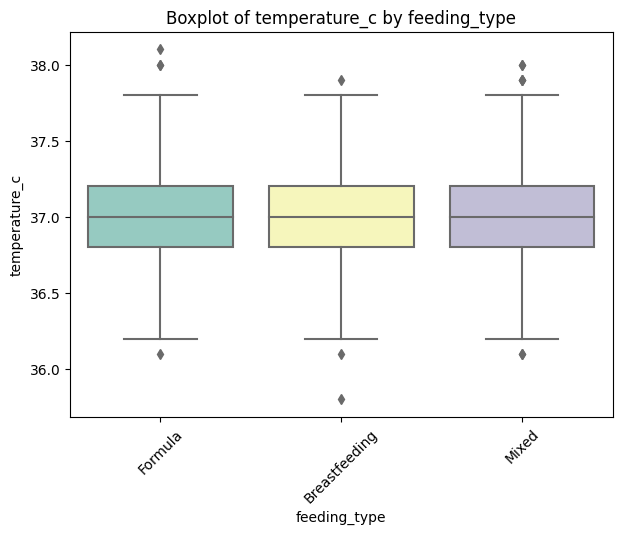

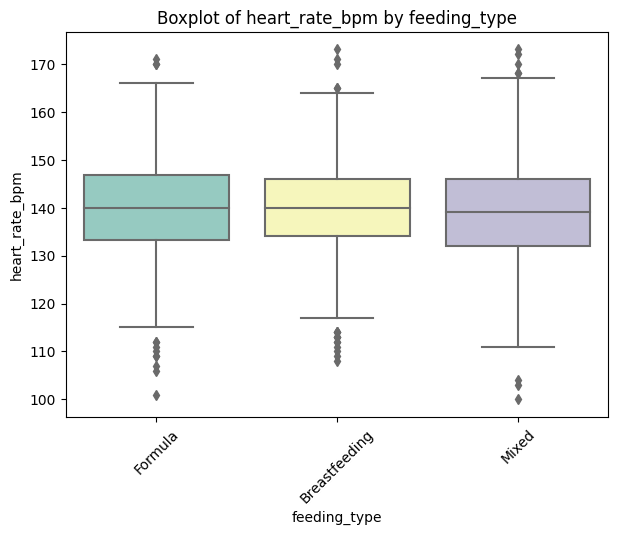

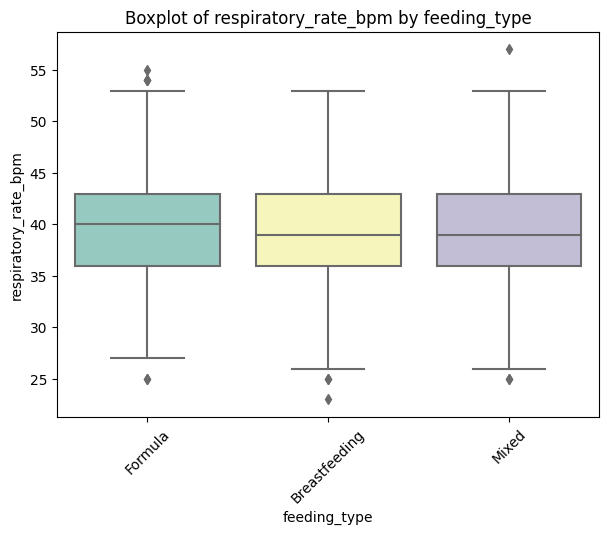

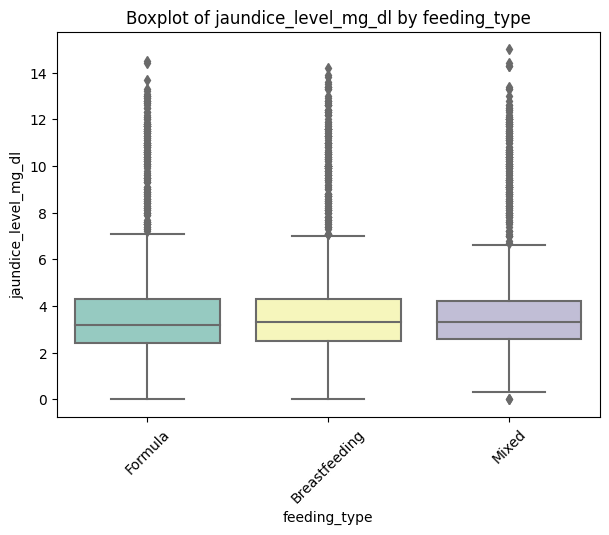

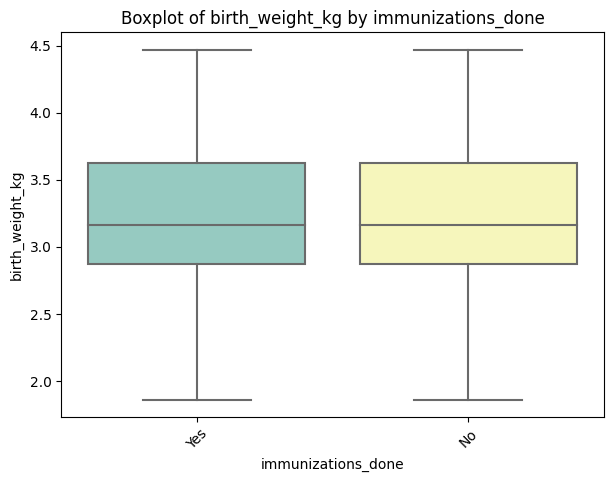

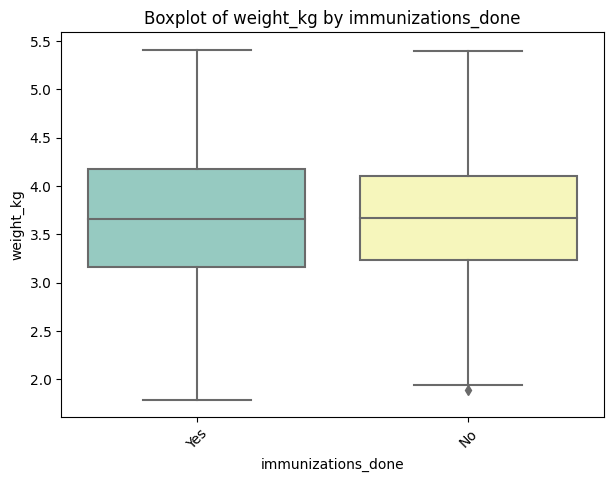

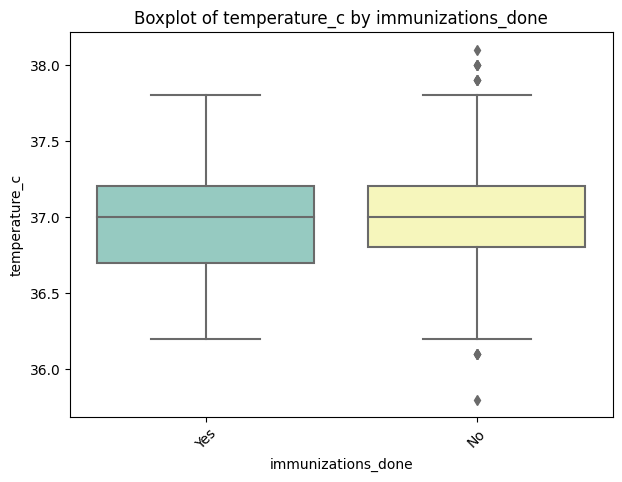

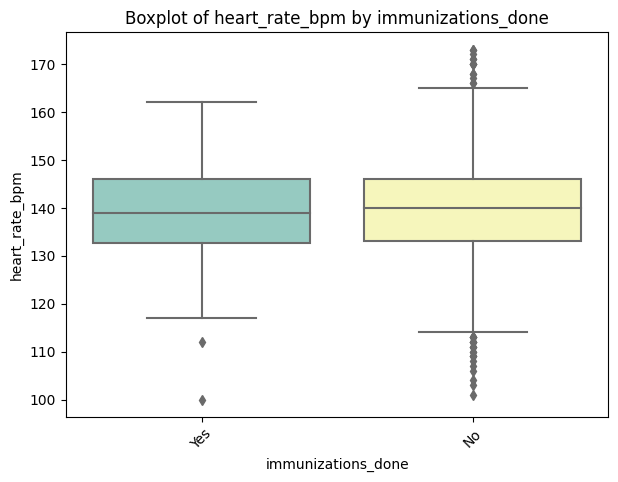

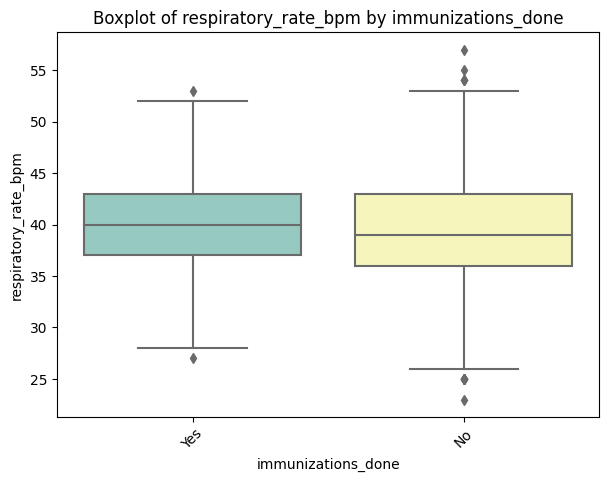

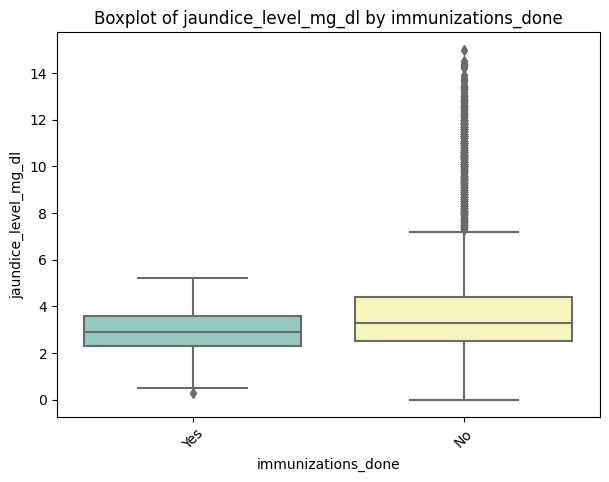

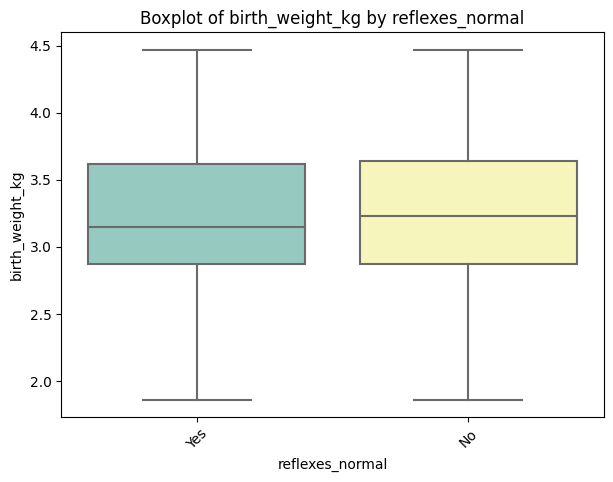

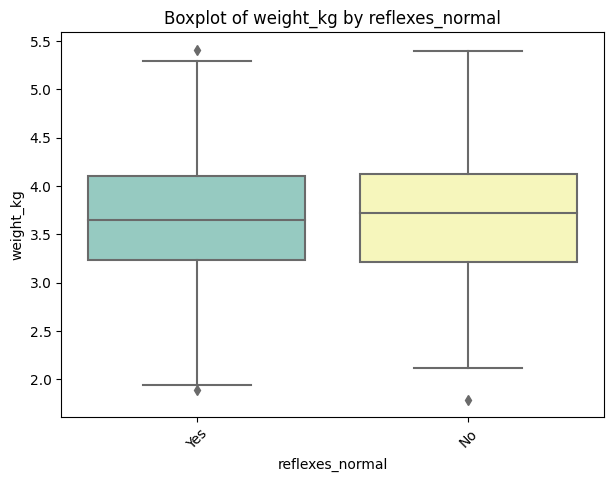

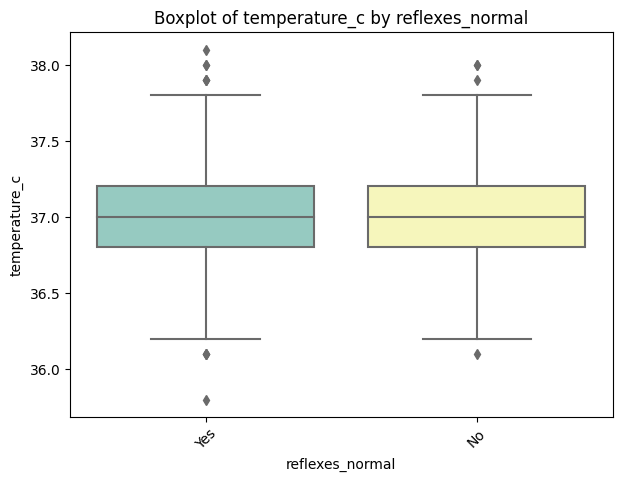

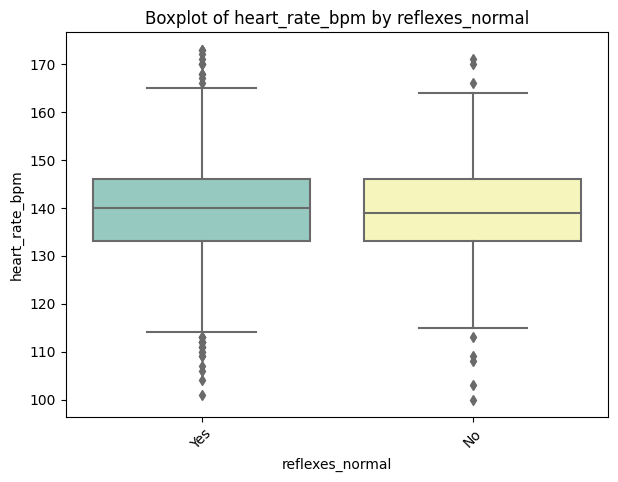

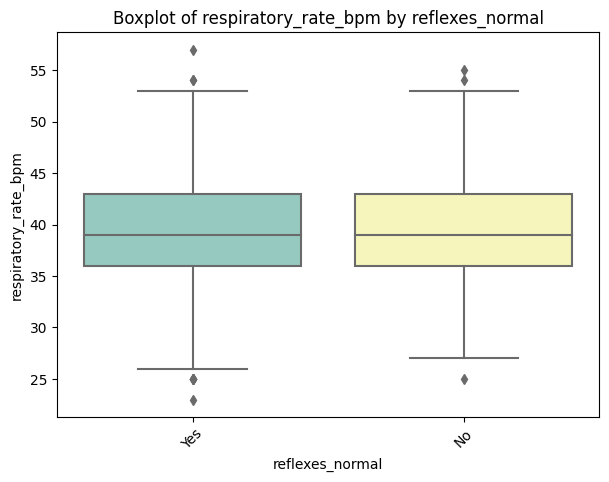

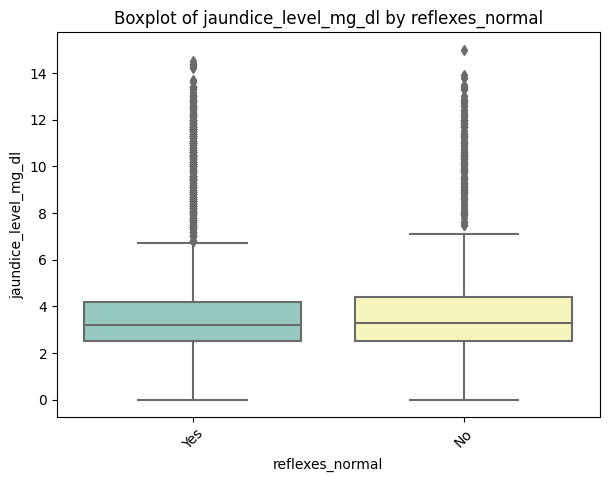

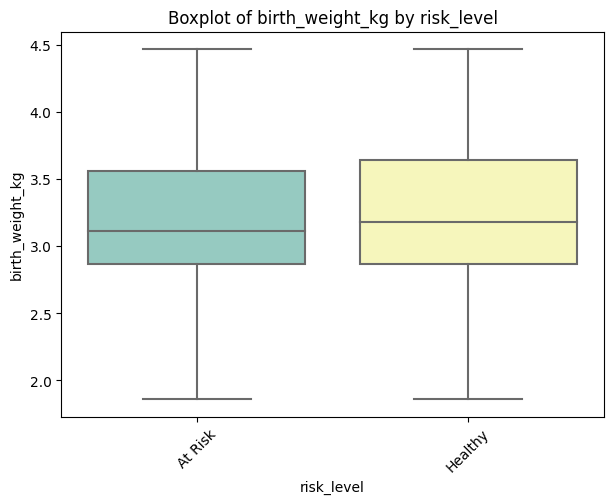

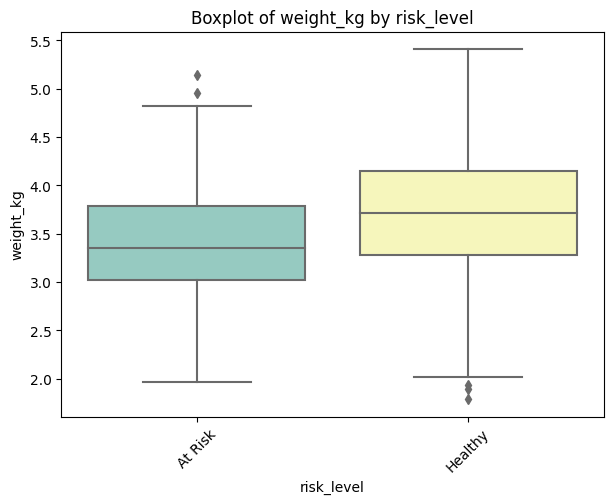

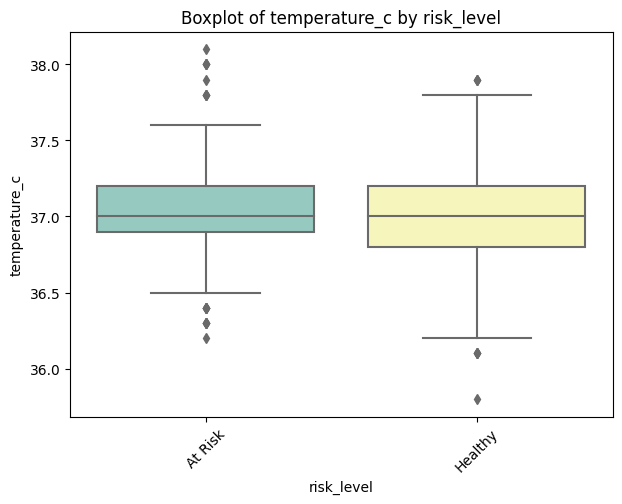

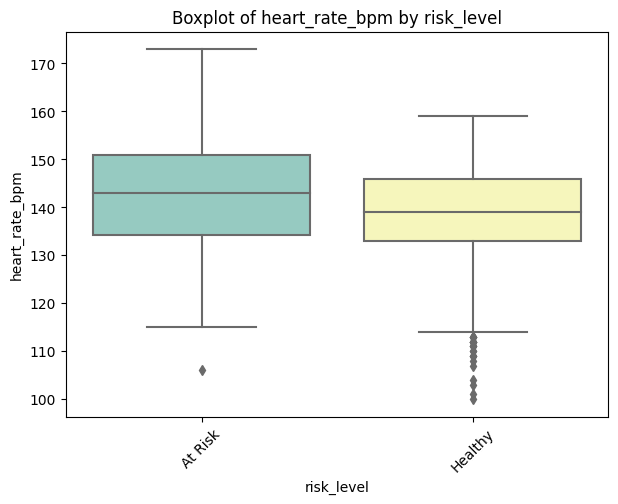

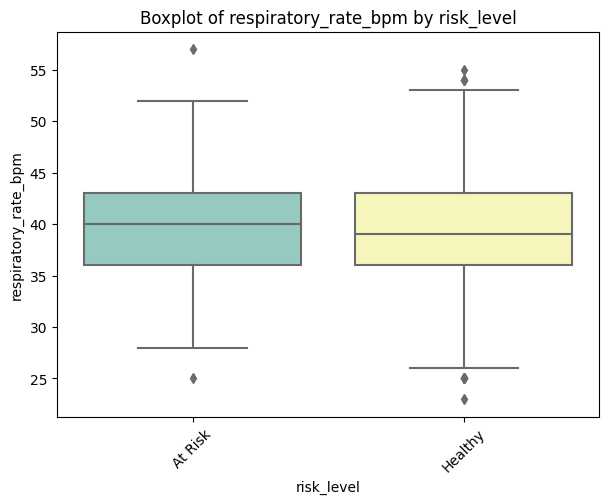

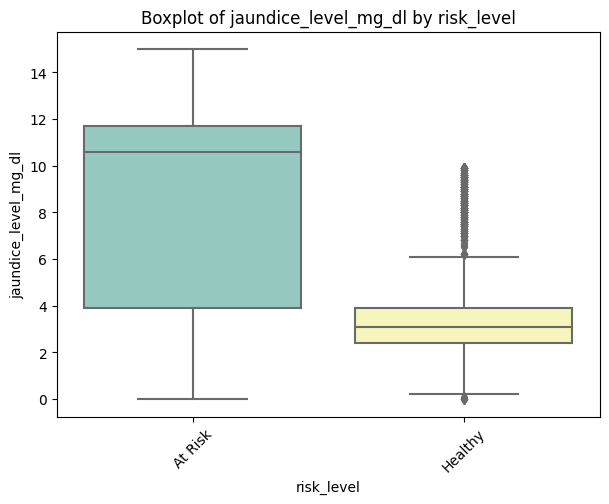

✅ All important boxplots generated successfully.
🔎 Interpretation Guide:
- The line inside each box represents the median value.
- The box height shows interquartile range (IQR).
- Whiskers show data spread, and dots outside represent outliers.
- Comparing across categories reveals differences (e.g., higher jaundice levels in At Risk newborns).


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reload dataset to keep categorical labels
df_original = pd.read_csv("/kaggle/input/newborn-health-monitoring-dataset/newborn_health_monitoring_with_risk.csv")

# Define categorical and numerical columns
categorical_cols = ["gender", "feeding_type", "immunizations_done", "reflexes_normal", "risk_level"]
numeric_cols = ["birth_weight_kg", "weight_kg", "temperature_c", "heart_rate_bpm", 
                "respiratory_rate_bpm", "jaundice_level_mg_dl"]

print("📊 Generating Boxplots for Important Features...")
print("These plots help visualize distribution, median, spread, and outliers of numerical variables across categories.\n")

for cat_col in categorical_cols:
    for num_col in numeric_cols:
        plt.figure(figsize=(7,5))
        sns.boxplot(x=cat_col, y=num_col, data=df_original, palette="Set3")
        plt.title(f"Boxplot of {num_col} by {cat_col}")
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.show()

print("✅ All important boxplots generated successfully.")
print("🔎 Interpretation Guide:")
print("- The line inside each box represents the median value.")
print("- The box height shows interquartile range (IQR).")
print("- Whiskers show data spread, and dots outside represent outliers.")
print("- Comparing across categories reveals differences (e.g., higher jaundice levels in At Risk newborns).")

🏥 MEDICAL DISTRIBUTION ANALYSIS
Comparing actual measurements against clinical reference ranges



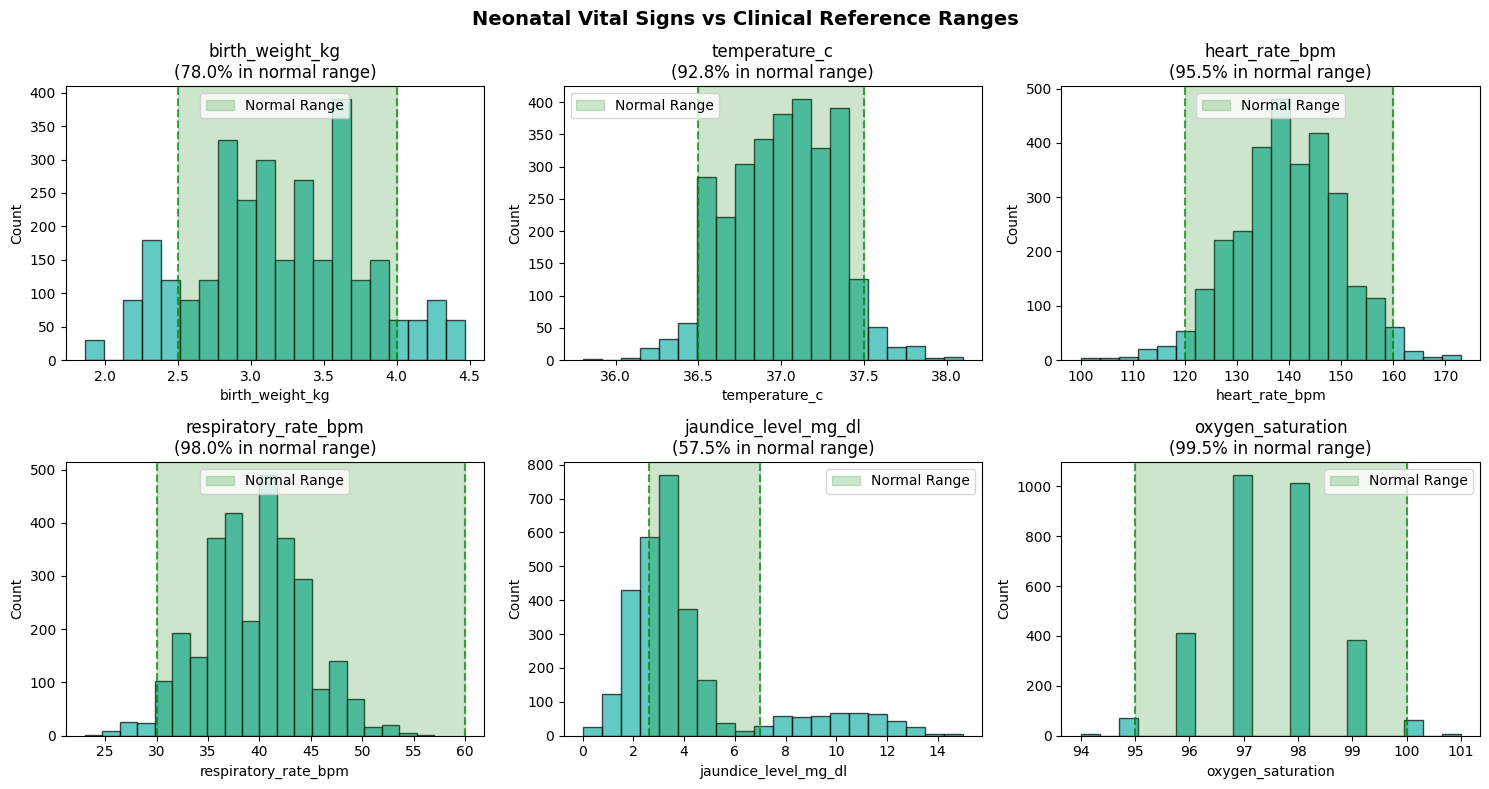

✅ Medical distribution review completed
💡 Green shaded area indicates normal clinical range
📈 Percentage shows proportion of newborns within healthy parameters


In [69]:
import matplotlib.pyplot as plt

# Medical parameters with normal ranges (for context)
medical_params = {
    'birth_weight_kg': (2.5, 4.0),
    'temperature_c': (36.5, 37.5),
    'heart_rate_bpm': (120, 160),
    'respiratory_rate_bpm': (30, 60),
    'jaundice_level_mg_dl': (2.6, 7.0),
    'oxygen_saturation': (95, 100)
}

print("🏥 MEDICAL DISTRIBUTION ANALYSIS")
print("Comparing actual measurements against clinical reference ranges\n")

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, (param, (low_ref, high_ref)) in enumerate(medical_params.items()):
    if param in df.columns:
        # Plot histogram
        axes[i].hist(df[param], bins=20, alpha=0.7, color='lightseagreen', 
                    edgecolor='black')
        
        # Add reference ranges
        axes[i].axvspan(low_ref, high_ref, alpha=0.2, color='green', 
                       label='Normal Range')
        axes[i].axvline(low_ref, color='green', linestyle='--', alpha=0.7)
        axes[i].axvline(high_ref, color='green', linestyle='--', alpha=0.7)
        
        # Calculate percentage within normal range
        in_range = ((df[param] >= low_ref) & (df[param] <= high_ref)).mean() * 100
        
        axes[i].set_title(f'{param}\n({in_range:.1f}% in normal range)')
        axes[i].set_xlabel(param)
        axes[i].set_ylabel('Count')
        axes[i].legend()

plt.suptitle('Neonatal Vital Signs vs Clinical Reference Ranges', 
             fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

print("✅ Medical distribution review completed")
print("💡 Green shaded area indicates normal clinical range")
print("📈 Percentage shows proportion of newborns within healthy parameters")

📊 Generating Feature Engineering Plots...
These plots help us discover feature relationships, patterns, and variables most useful for predicting newborn risk levels.



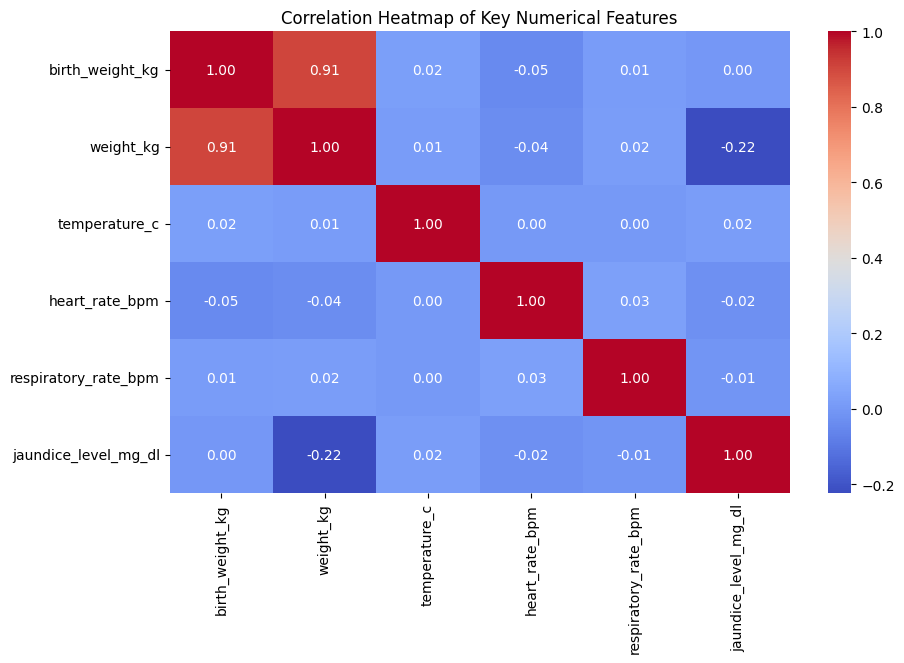

✅ Correlation Heatmap shows linear relationships among numerical features.


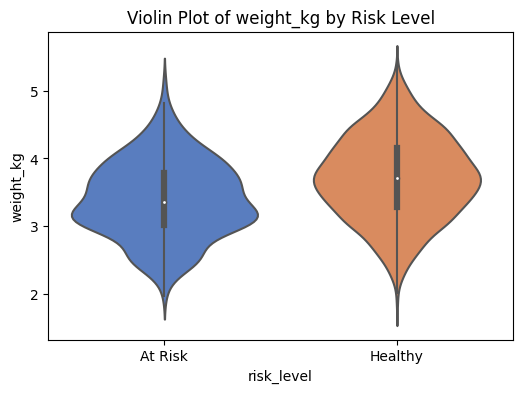

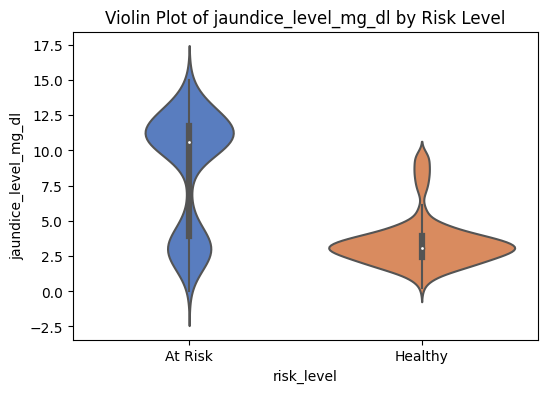

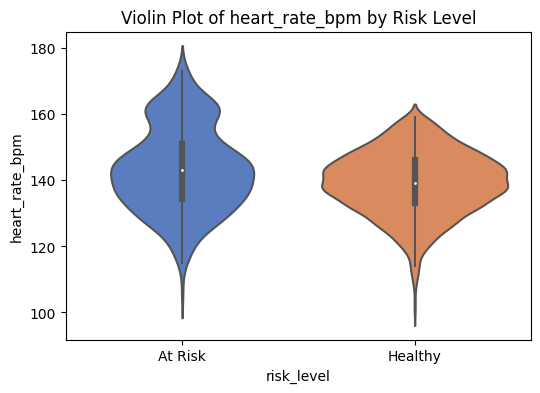

✅ Violin plots reveal full distribution shapes, highlighting subtle risk-level differences.


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping wi

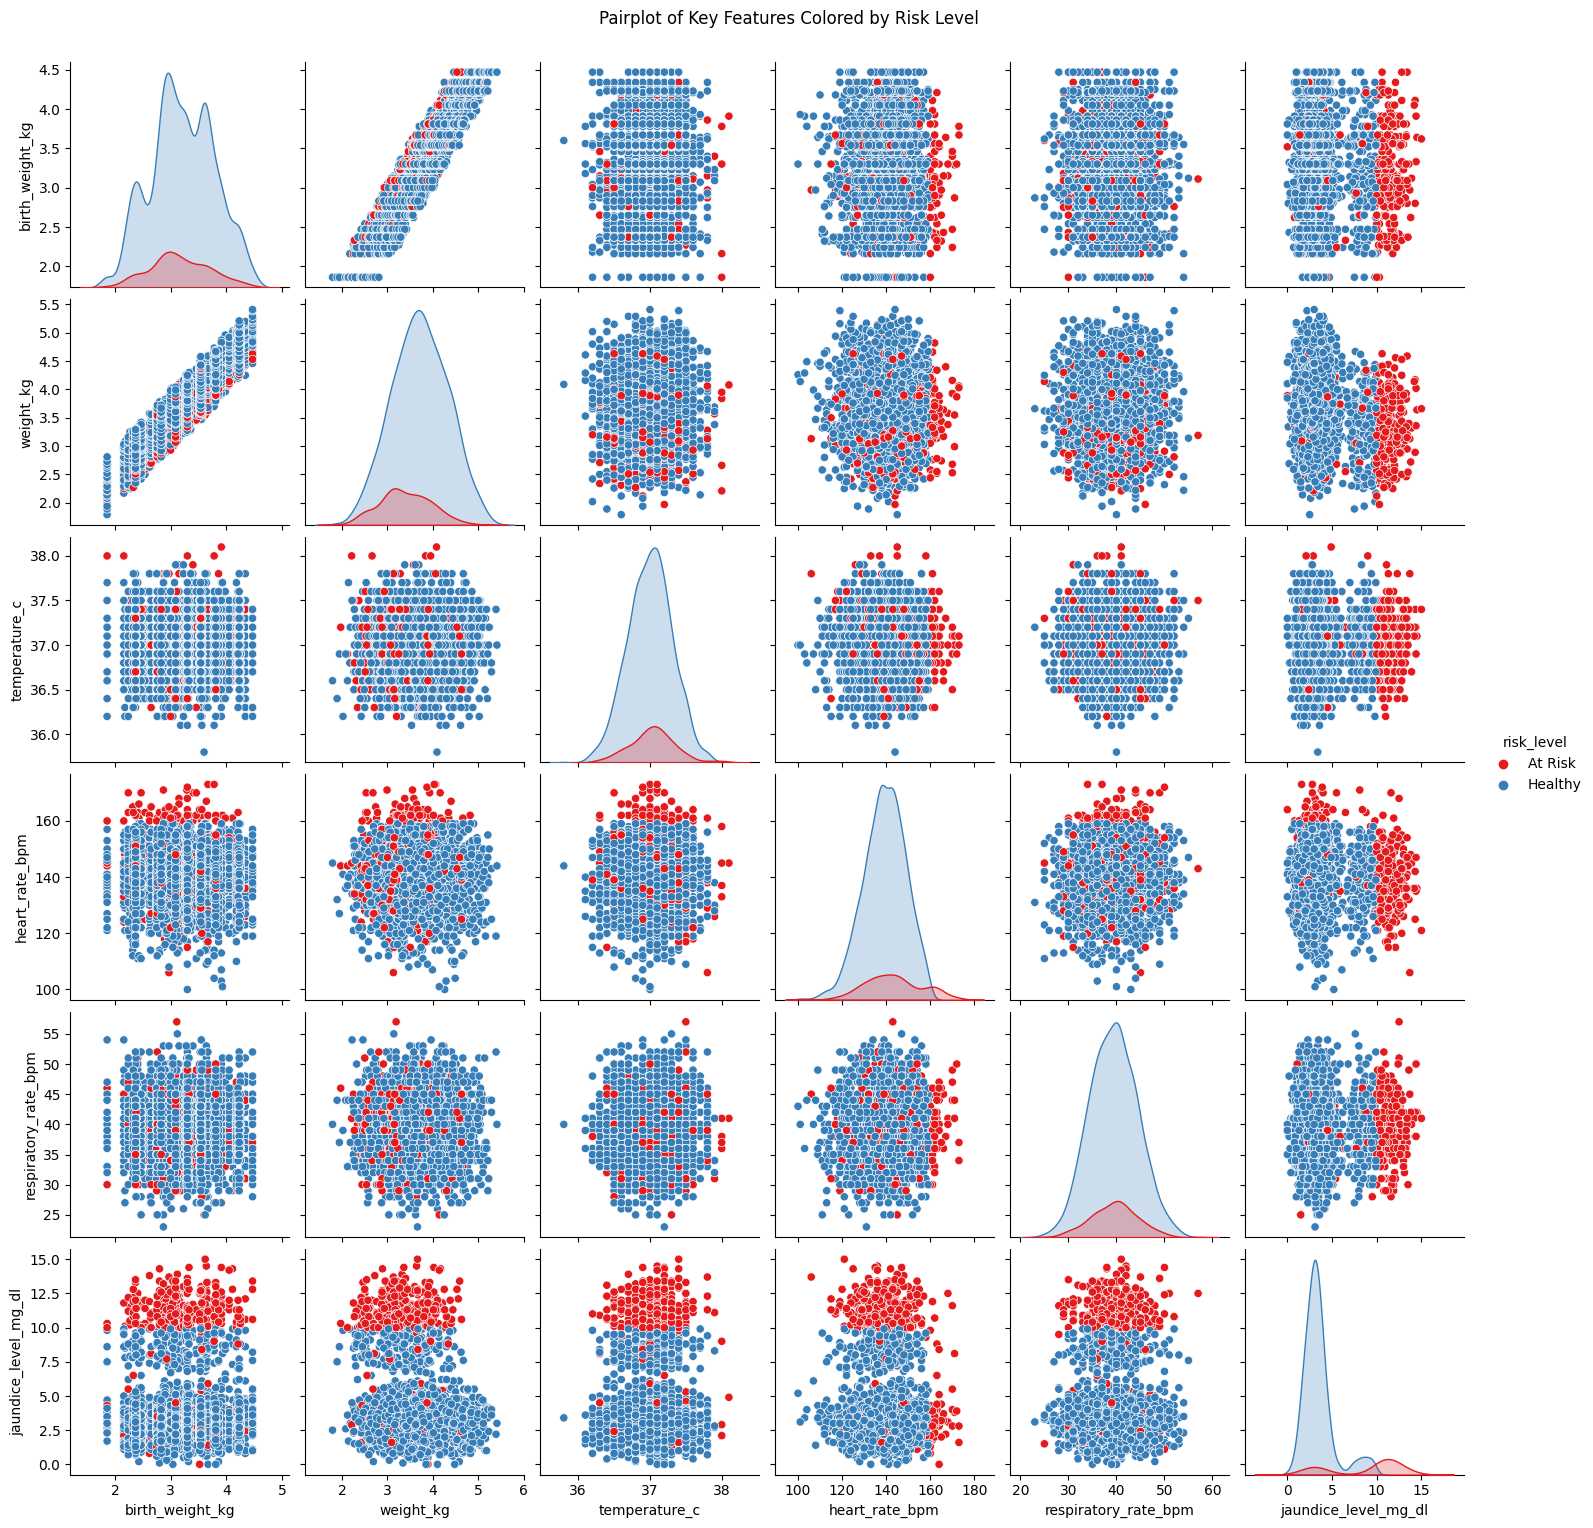

✅ Pairplot shows relationships and clusters across important features with respect to risk level.


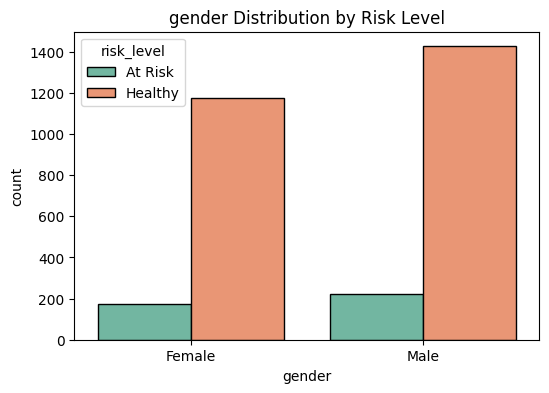

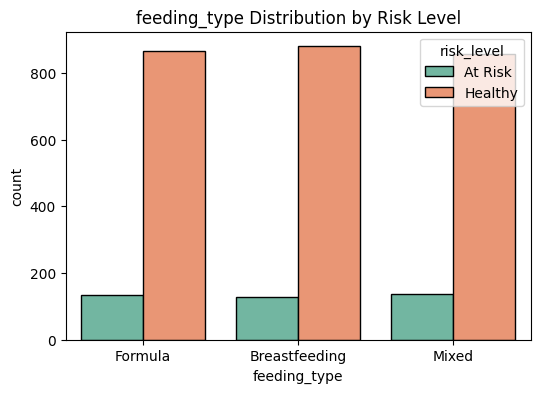

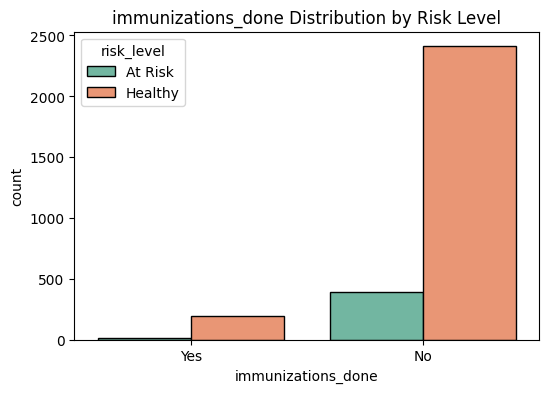

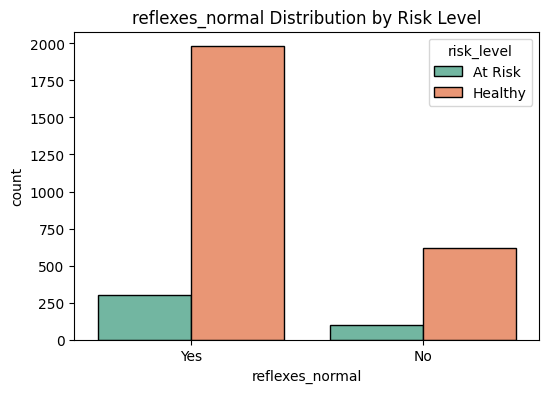

✅ Barplots illustrate how categorical variables relate to Healthy vs At Risk classification.

🔎 Interpretation Guide:
- Correlation Heatmap: Identify redundant features or strong predictors.
- Boxplots & Violin Plots: Show how risk affects health measurements (e.g., higher jaundice in At Risk).
- Pairplot: Reveals clusters/separability between classes based on multiple features.
- Barplots: Show categorical patterns linked to newborn risk (e.g., immunization status vs risk).


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reload dataset to keep categorical labels
df_original = pd.read_csv("/kaggle/input/newborn-health-monitoring-dataset/newborn_health_monitoring_with_risk.csv")

# Define categorical and numerical features
categorical_cols = ["gender", "feeding_type", "immunizations_done", "reflexes_normal"]
numeric_cols = ["birth_weight_kg", "weight_kg", "temperature_c", "heart_rate_bpm", 
                "respiratory_rate_bpm", "jaundice_level_mg_dl"]

print("📊 Generating Feature Engineering Plots...")
print("These plots help us discover feature relationships, patterns, and variables most useful for predicting newborn risk levels.\n")

# 1. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_original[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Numerical Features")
plt.show()
print("✅ Correlation Heatmap shows linear relationships among numerical features.")

# 2. Violin plots for distribution + density
for num_col in ["weight_kg", "jaundice_level_mg_dl", "heart_rate_bpm"]:
    plt.figure(figsize=(6,4))
    sns.violinplot(x="risk_level", y=num_col, data=df_original, palette="muted")
    plt.title(f"Violin Plot of {num_col} by Risk Level")
    plt.show()
print("✅ Violin plots reveal full distribution shapes, highlighting subtle risk-level differences.")

# 3. Pairplot for key features
sns.pairplot(df_original[numeric_cols + ["risk_level"]], hue="risk_level", palette="Set1", diag_kind="kde")
plt.suptitle("Pairplot of Key Features Colored by Risk Level", y=1.02)
plt.show()
print("✅ Pairplot shows relationships and clusters across important features with respect to risk level.")

# 4. Barplots for categorical features vs risk level
for cat_col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=cat_col, hue="risk_level", data=df_original, palette="Set2", edgecolor="black")
    plt.title(f"{cat_col} Distribution by Risk Level")
    plt.show()
print("✅ Barplots illustrate how categorical variables relate to Healthy vs At Risk classification.")

print("\n🔎 Interpretation Guide:")
print("- Correlation Heatmap: Identify redundant features or strong predictors.")
print("- Boxplots & Violin Plots: Show how risk affects health measurements (e.g., higher jaundice in At Risk).")
print("- Pairplot: Reveals clusters/separability between classes based on multiple features.")
print("- Barplots: Show categorical patterns linked to newborn risk (e.g., immunization status vs risk).")

🚀 Running Models with Cross-Validation + Hyperparameter Tuning...

✅ Logistic Regression
Best Params: {'C': 0.1}
              precision    recall  f1-score   support

     Healthy       0.85      0.57      0.69        80
     At Risk       0.94      0.98      0.96       520

    accuracy                           0.93       600
   macro avg       0.89      0.78      0.82       600
weighted avg       0.93      0.93      0.92       600



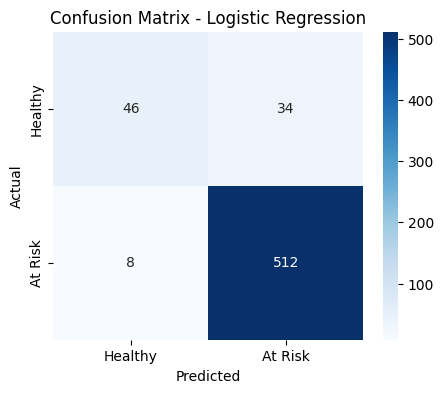

✅ Decision Tree
Best Params: {'max_depth': 5, 'min_samples_split': 2}
              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00        80
     At Risk       1.00      1.00      1.00       520

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



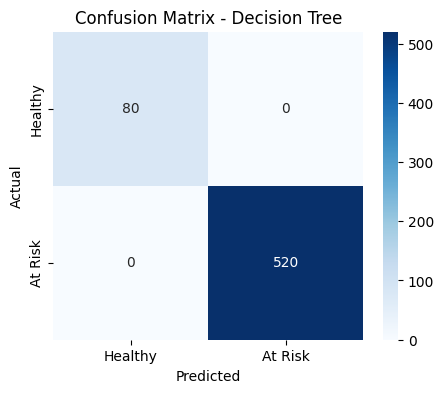

✅ Random Forest
Best Params: {'max_depth': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00        80
     At Risk       1.00      1.00      1.00       520

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



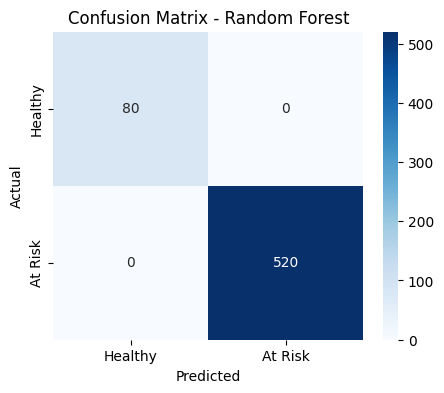

✅ Gradient Boosting
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00        80
     At Risk       1.00      1.00      1.00       520

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



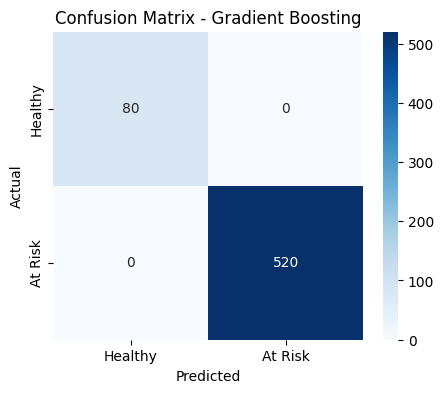

✅ SVM
Best Params: {'C': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

     Healthy       0.91      0.75      0.82        80
     At Risk       0.96      0.99      0.98       520

    accuracy                           0.96       600
   macro avg       0.94      0.87      0.90       600
weighted avg       0.96      0.96      0.95       600



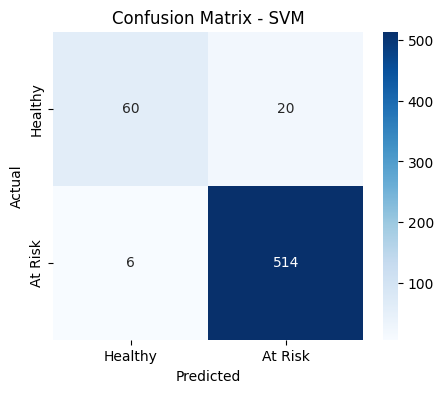

✅ KNN
Best Params: {'n_neighbors': 7, 'weights': 'uniform'}
              precision    recall  f1-score   support

     Healthy       0.88      0.54      0.67        80
     At Risk       0.93      0.99      0.96       520

    accuracy                           0.93       600
   macro avg       0.91      0.76      0.81       600
weighted avg       0.93      0.93      0.92       600



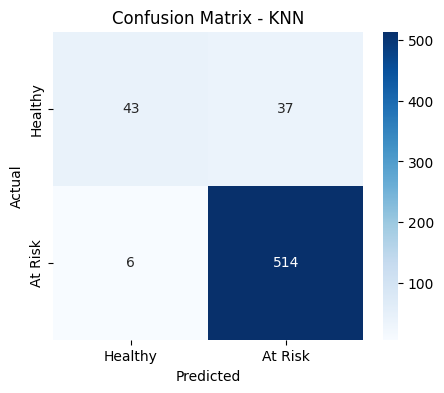

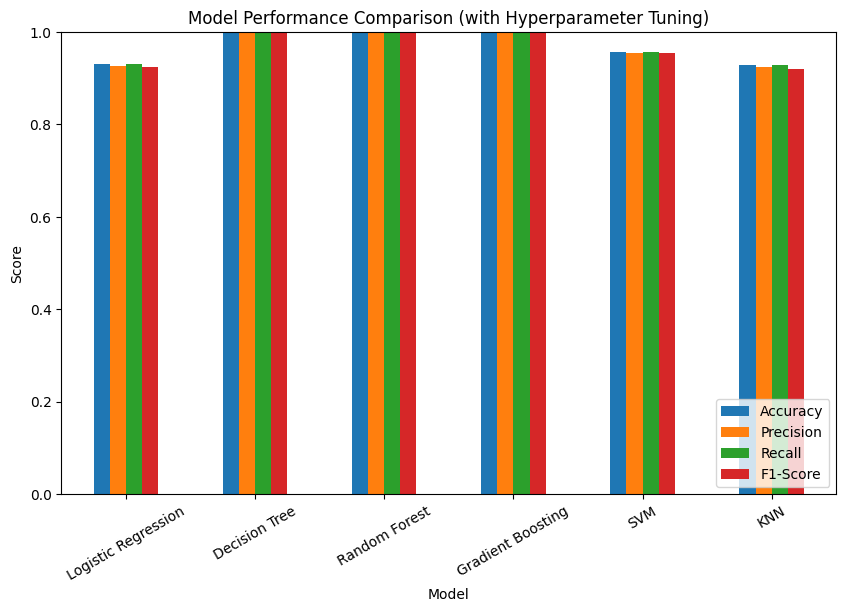


📊 Final Summary of Model Performances:
              Model  Accuracy  Precision   Recall  F1-Score
      Decision Tree  1.000000   1.000000 1.000000  1.000000
      Random Forest  1.000000   1.000000 1.000000  1.000000
  Gradient Boosting  1.000000   1.000000 1.000000  1.000000
                SVM  0.956667   0.955419 0.956667  0.954877
Logistic Regression  0.930000   0.926279 0.930000  0.924063
                KNN  0.928333   0.925476 0.928333  0.920759

🔎 Insights:
- Cross-validation + hyperparameter tuning improves reliability.
- Precision & Recall are crucial in healthcare.
- F1-score balances both, so the best F1 model is usually the best clinical choice.


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# ============================
# Load dataset
# ============================
df = pd.read_csv("/kaggle/input/newborn-health-monitoring-dataset/newborn_health_monitoring_with_risk.csv")

# Drop irrelevant columns
df = df.drop(["baby_id", "name", "date"], axis=1, errors="ignore")

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Separate features and target
X = df.drop("risk_level", axis=1)
y = df["risk_level"]

# ============================
# Handle missing values
# ============================
num_cols = X.select_dtypes(include=["int64","float64"]).columns
cat_cols = X.select_dtypes(exclude=["int64","float64"]).columns

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

X[num_cols] = num_imputer.fit_transform(X[num_cols])
if len(cat_cols) > 0:
    X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# ============================
# Train-test split
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ============================
# Define models & hyperparameters
# ============================
param_grids = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000, solver="lbfgs"),
        {"C": [0.01, 0.1, 1, 10]}
    ),
    "Decision Tree": (
        DecisionTreeClassifier(random_state=42),
        {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]}
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {"n_estimators": [50, 100], "max_depth": [5, 10, None]}
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(random_state=42),
        {"n_estimators": [50, 100], "learning_rate": [0.05, 0.1], "max_depth": [3, 5]}
    ),
    "SVM": (
        SVC(probability=True, random_state=42),
        {"C": [0.1, 1], "kernel": ["linear", "rbf"]}
    ),
    "KNN": (
        KNeighborsClassifier(),
        {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}
    )
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ============================
# Train, tune & evaluate models
# ============================
results = []
best_models = {}

print("🚀 Running Models with Cross-Validation + Hyperparameter Tuning...\n")

for name, (model, params) in param_grids.items():
    try:
        grid = GridSearchCV(model, params, cv=cv, scoring="accuracy", n_jobs=-1, error_score="raise")
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_models[name] = best_model

        # Predictions
        y_pred = best_model.predict(X_test)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
        rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
        f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

        results.append([name, acc, prec, rec, f1])

        print(f"✅ {name}")
        print(f"Best Params: {grid.best_params_}")
        print(classification_report(y_test, y_pred, target_names=["Healthy", "At Risk"]))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["Healthy","At Risk"], yticklabels=["Healthy","At Risk"])
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    except Exception as e:
        print(f"❌ {name} failed with error: {e}")

# ============================
# Results Summary
# ============================
if results:
    results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

    results_df.set_index("Model")[["Accuracy","Precision","Recall","F1-Score"]].plot(kind="bar", figsize=(10,6), rot=30)
    plt.title("Model Performance Comparison (with Hyperparameter Tuning)")
    plt.ylabel("Score")
    plt.ylim(0,1)
    plt.legend(loc="lower right")
    plt.show()

    print("\n📊 Final Summary of Model Performances:")
    print(results_df.sort_values(by="F1-Score", ascending=False).to_string(index=False))

    print("\n🔎 Insights:")
    print("- Cross-validation + hyperparameter tuning improves reliability.")
    print("- Precision & Recall are crucial in healthcare.")
    print("- F1-score balances both, so the best F1 model is usually the best clinical choice.")
else:
    print("\n⚠️ No models were successfully trained. Check preprocessing steps again.")

📊 Feature Importance Analysis



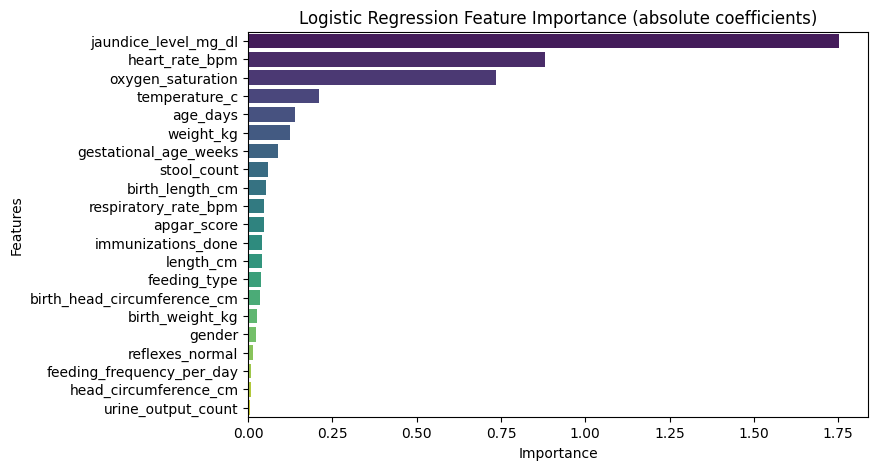

✅ Logistic Regression importance reflects how strongly each feature contributes linearly to risk prediction.



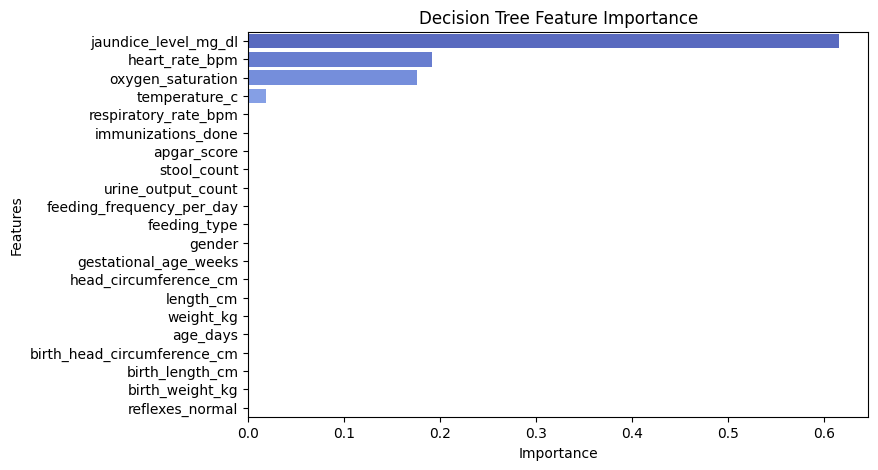

✅ Decision Tree importance is based on how much each feature reduces prediction error (Gini/entropy splits).



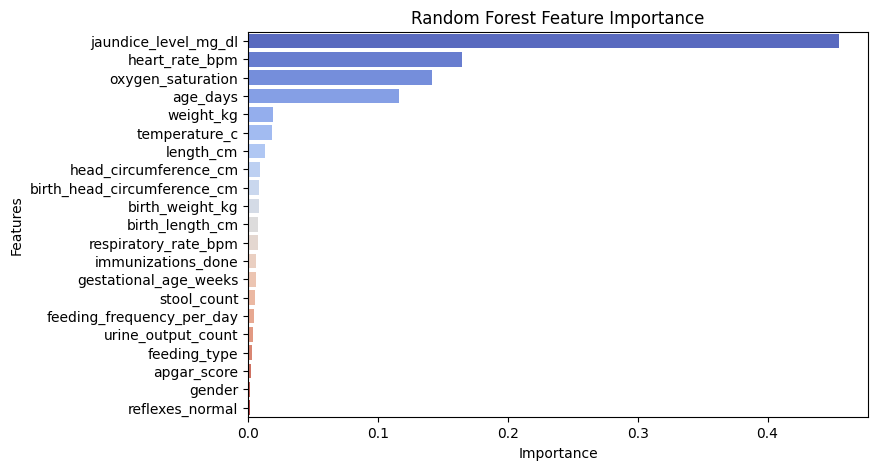

✅ Random Forest importance is based on how much each feature reduces prediction error (Gini/entropy splits).



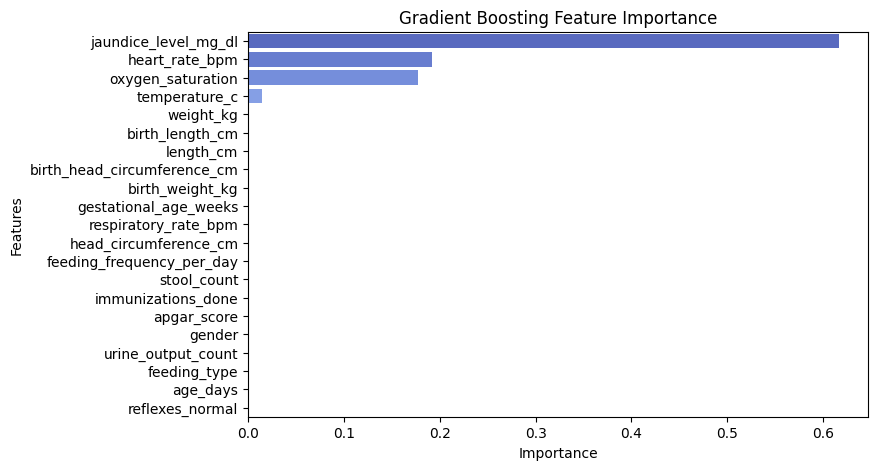

✅ Gradient Boosting importance is based on how much each feature reduces prediction error (Gini/entropy splits).



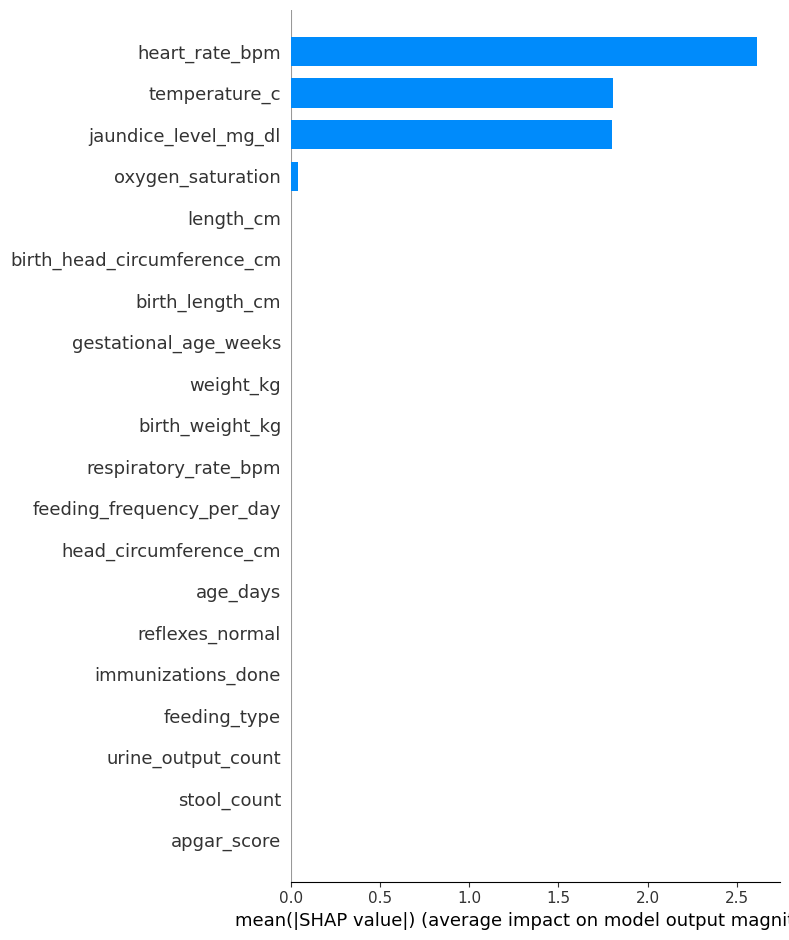

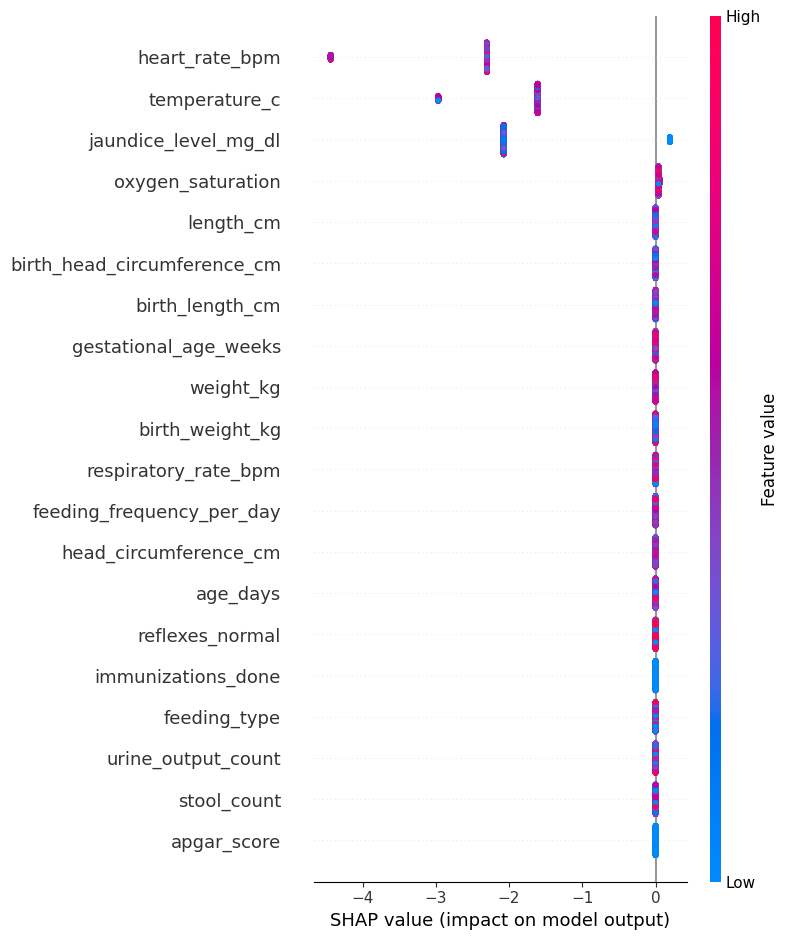

✅ SHAP values explain both the magnitude and direction of feature impact on predictions.



In [72]:
import shap

# Convert X back to DataFrame for feature names
X_df = pd.DataFrame(X, columns=df.drop("risk_level", axis=1).columns)

print("📊 Feature Importance Analysis\n")

# ============================
# Logistic Regression Importance
# ============================
if "Logistic Regression" in best_models:
    lr_model = best_models["Logistic Regression"]
    importance = abs(lr_model.coef_[0])
    lr_importances = pd.Series(importance, index=X_df.columns).sort_values(ascending=False)

    plt.figure(figsize=(8,5))
    sns.barplot(x=lr_importances.values, y=lr_importances.index, palette="viridis")
    plt.title("Logistic Regression Feature Importance (absolute coefficients)")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
    print("✅ Logistic Regression importance reflects how strongly each feature contributes linearly to risk prediction.\n")

# ============================
# Tree-based Models Importance
# ============================
for model_name in ["Decision Tree", "Random Forest", "Gradient Boosting"]:
    if model_name in best_models:
        model = best_models[model_name]
        importance = model.feature_importances_
        feat_imp = pd.Series(importance, index=X_df.columns).sort_values(ascending=False)

        plt.figure(figsize=(8,5))
        sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="coolwarm")
        plt.title(f"{model_name} Feature Importance")
        plt.xlabel("Importance")
        plt.ylabel("Features")
        plt.show()
        print(f"✅ {model_name} importance is based on how much each feature reduces prediction error (Gini/entropy splits).\n")

# ============================
# SHAP for complex models (e.g., SVM, KNN, Gradient Boosting)
# ============================
# We'll use Gradient Boosting (if available) as the SHAP example
if "Gradient Boosting" in best_models:
    gb_model = best_models["Gradient Boosting"]

    # SHAP explainer
    explainer = shap.TreeExplainer(gb_model)
    shap_values = explainer.shap_values(X_df)

    # Summary plot
    shap.summary_plot(shap_values, X_df, plot_type="bar", show=True)
    shap.summary_plot(shap_values, X_df, show=True)
    print("✅ SHAP values explain both the magnitude and direction of feature impact on predictions.\n")

🚀 Building Enhanced MLP Model...
📊 Enhanced MLP Architecture Summary:


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_94 (Dense)                │ (None, 256)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_80 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_81 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,466 (197.13 KB)

 Trainable params: 49,698 (194.13 KB)

 Non-trainable params: 768 (3.00 KB)


🚀 Building Enhanced LSTM Model...


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


📊 Enhanced LSTM Architecture Summary:


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                  │ (None, 21, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_82 (Dropout)            │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 21, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 21, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_83 (Dropout)            │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 21, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_84 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_85 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,666 (522.13 KB)

 Trainable params: 133,154 (520.13 KB)

 Non-trainable params: 512 (2.00 KB)


🎯 Training Enhanced MLP Model...

🎯 Training Enhanced MLP Model...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8104 - loss: 0.7288 - precision: 0.8104 - recall: 0.8104 - val_accuracy: 0.9333 - val_loss: 0.6165 - val_precision: 0.9333 - val_recall: 0.9333 - learning_rate: 0.0010
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8837 - loss: 0.5722 - precision: 0.8837 - recall: 0.8837 - val_accuracy: 0.9283 - val_loss: 0.4920 - val_precision: 0.9283 - val_recall: 0.9283 - learning_rate: 0.0010
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9009 - loss: 0.5043 - precision: 0.9009 - recall: 0.9009 - val_accuracy: 0.9467 - val_loss: 0.4297 - val_precision: 0.9467 - val_recall: 0.9467 - learning_rate: 0.0010
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9174 - loss: 0.4680 - precision: 0.9174 - recall: 0.9174 - val_accuracy: 0.9517 - val_loss: 0.3965 - val_precision: 0.9517 - val_recall: 0.9517 - learning_rate: 0.0010
Epo

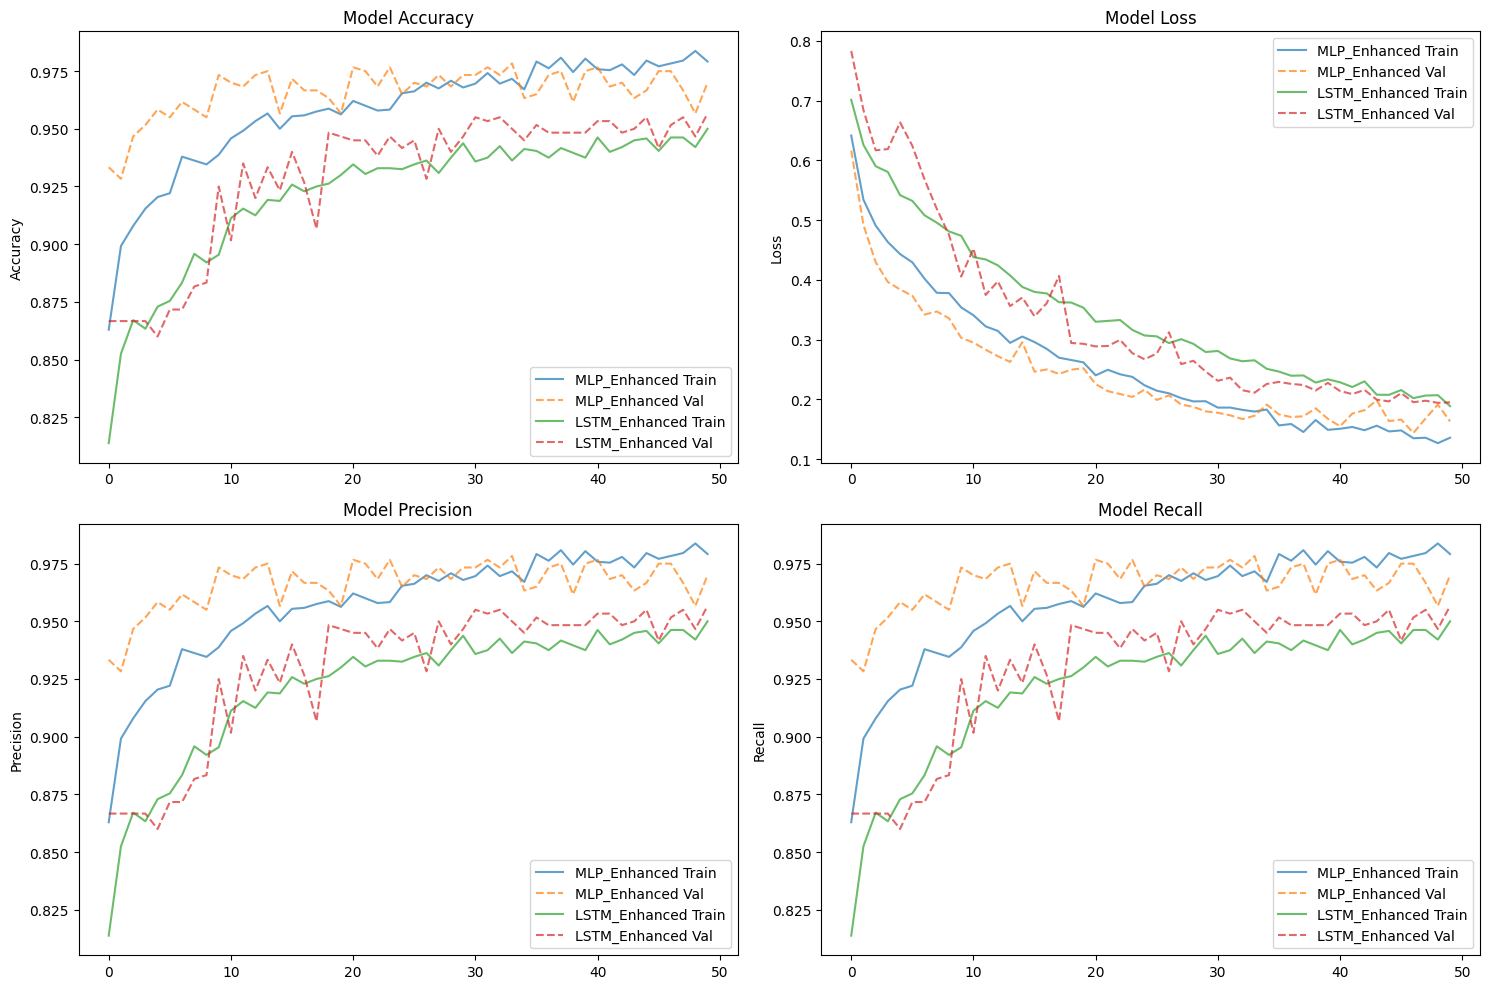


🏆 Final Model Comparison:
Model                Test Accuracy   Test Loss      
--------------------------------------------------
MLP_Enhanced         0.9750          0.1440         
LSTM_Enhanced        0.9467          0.1944         

🎯 Ensemble Model Accuracy: 0.9767


In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import numpy as np

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(df["risk_level"])
# y_cat = to_categorical(y_encoded)
# Convert y_train and y_test to categorical (one-hot encoded)
y_train_cat = to_categorical(y_train, num_classes=len(np.unique(y)))
y_test_cat = to_categorical(y_test, num_classes=len(np.unique(y)))

# ============================
# Enhanced MLP Model
# ============================
print("🚀 Building Enhanced MLP Model...")

mlp = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), 
           kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])

# Custom optimizer with learning rate scheduling
optimizer = Adam(learning_rate=0.001)

mlp.compile(optimizer=optimizer, 
            loss='categorical_crossentropy', 
            metrics=['accuracy', 'precision', 'recall'])

print("📊 Enhanced MLP Architecture Summary:")
mlp.summary()

# ============================
# Enhanced LSTM Model
# ============================
print("\n🚀 Building Enhanced LSTM Model...")

# Reshape data for LSTM (if not already done)
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

lstm = Sequential([
    #Input(shape=(X_train.shape[1], 1)),  # Use Input layer
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1),
          kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    
    LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    
    LSTM(32, kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])

lstm.compile(optimizer=Adam(learning_rate=0.0005), 
             loss='categorical_crossentropy', 
             metrics=['accuracy', 'precision', 'recall'])

print("📊 Enhanced LSTM Architecture Summary:")
lstm.summary()

# ============================
# Callbacks for Better Training
# ============================
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.00001,
    verbose=1
)

callbacks = [early_stopping, reduce_lr]

# ============================
# Train Enhanced Models
# ============================

print("\n🎯 Training Enhanced MLP Model...")
histories = {}  # Add this line
results = {}    # Add this line

print("\n🎯 Training Enhanced MLP Model...")
histories["MLP_Enhanced"] = mlp.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

print("\n🎯 Training Enhanced LSTM Model...")
histories["LSTM_Enhanced"] = lstm.fit(
    X_train_lstm, y_train_cat,  # Change y_train to y_train_cat
    validation_data=(X_test_lstm, y_test_cat),  # Change y_test to y_test_cat
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# ============================
# Evaluate Models
# ============================
print("\n📊 Model Evaluation:")
# MLP Evaluation
results["MLP_Enhanced"] = mlp.evaluate(X_test, y_test_cat, verbose=0)  # Change y_test to y_test_cat
print(f"✅ Enhanced MLP Test Accuracy: {results['MLP_Enhanced'][1]:.4f}")

# LSTM Evaluation
results["LSTM_Enhanced"] = lstm.evaluate(X_test_lstm, y_test_cat, verbose=0)  # Change y_test to y_test_cat
print(f"✅ Enhanced LSTM Test Accuracy: {results['LSTM_Enhanced'][1]:.4f}")

# ============================
# Additional: Simple Ensemble of MLP and LSTM
# ============================
print("\n🤝 Creating Ensemble Model...")

def ensemble_predict(mlp_model, lstm_model, X_mlp, X_lstm):
    """Weighted ensemble prediction"""
    mlp_proba = mlp_model.predict(X_mlp, verbose=0)
    lstm_proba = lstm_model.predict(X_lstm, verbose=0)
    
    # Weighted average (adjust weights based on individual performance)
    ensemble_proba = 0.6 * mlp_proba + 0.4 * lstm_proba
    return np.argmax(ensemble_proba, axis=1)

# Get ensemble predictions
y_pred_ensemble = ensemble_predict(mlp, lstm, X_test, X_test_lstm)
y_true = np.argmax(y_test_cat, axis=1)  # Use y_test_cat instead of y_test

ensemble_accuracy = np.sum(y_pred_ensemble == y_true) / len(y_true)
print(f"✅ Ensemble Accuracy: {ensemble_accuracy:.4f}")

# ============================
# Visualization of Training Progress
# ============================
import matplotlib.pyplot as plt

def plot_training_history(histories):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for model_name, history in histories.items():
        # Accuracy plot
        axes[0, 0].plot(history.history['accuracy'], label=f'{model_name} Train', alpha=0.7)
        axes[0, 0].plot(history.history['val_accuracy'], label=f'{model_name} Val', linestyle='--', alpha=0.7)
        axes[0, 0].set_title('Model Accuracy')
        axes[0, 0].set_ylabel('Accuracy')
        axes[0, 0].legend()
        
        # Loss plot
        axes[0, 1].plot(history.history['loss'], label=f'{model_name} Train', alpha=0.7)
        axes[0, 1].plot(history.history['val_loss'], label=f'{model_name} Val', linestyle='--', alpha=0.7)
        axes[0, 1].set_title('Model Loss')
        axes[0, 1].set_ylabel('Loss')
        axes[0, 1].legend()
        
        # Precision plot (if available)
        if 'precision' in history.history:
            axes[1, 0].plot(history.history['precision'], label=f'{model_name} Train', alpha=0.7)
            axes[1, 0].plot(history.history['val_precision'], label=f'{model_name} Val', linestyle='--', alpha=0.7)
            axes[1, 0].set_title('Model Precision')
            axes[1, 0].set_ylabel('Precision')
            axes[1, 0].legend()
        
        # Recall plot (if available)
        if 'recall' in history.history:
            axes[1, 1].plot(history.history['recall'], label=f'{model_name} Train', alpha=0.7)
            axes[1, 1].plot(history.history['val_recall'], label=f'{model_name} Val', linestyle='--', alpha=0.7)
            axes[1, 1].set_title('Model Recall')
            axes[1, 1].set_ylabel('Recall')
            axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()

print("\n📈 Plotting Training History...")
plot_training_history(histories)

# ============================
# Model Comparison
# ============================
print("\n🏆 Final Model Comparison:")
print(f"{'Model':<20} {'Test Accuracy':<15} {'Test Loss':<15}")
print("-" * 50)
for model_name, result in results.items():
    if 'Enhanced' in model_name:
        print(f"{model_name:<20} {result[1]:<15.4f} {result[0]:<15.4f}")

print(f"\n🎯 Ensemble Model Accuracy: {ensemble_accuracy:.4f}")

In [82]:
# ============================
# Download Models for Offline Use
# ============================

# Save MLP model
mlp.save('newborn_health_mlp.h5')
print("✅ MLP model saved: 'newborn_health_mlp.h5'")

# Save LSTM model  
lstm.save('newborn_health_lstm.h5')
print("✅ LSTM model saved: 'newborn_health_lstm.h5'")

# Create download links
from IPython.display import FileLink
print("\n📥 Download Links:")
print("MLP Model:", FileLink('newborn_health_mlp.h5'))
print("LSTM Model:", FileLink('newborn_health_lstm.h5'))



✅ MLP model saved: 'newborn_health_mlp.h5'
✅ LSTM model saved: 'newborn_health_lstm.h5'

📥 Download Links:
MLP Model: /kaggle/working/newborn_health_mlp.h5
LSTM Model: /kaggle/working/newborn_health_lstm.h5


In [83]:
from IPython.display import display, FileLink

# Create clickable download links
display(FileLink('newborn_health_mlp.h5', result_html_prefix="📥 MLP Model: "))
display(FileLink('newborn_health_lstm.h5', result_html_prefix="📥 LSTM Model: "))

/kaggle/working/newborn_health_mlp.h5

/kaggle/working/newborn_health_lstm.h5